# Title of notebook

Brief 1-2 sentence description of notebook.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os

In [3]:
# Imports of all used packages and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from scipy import stats
import itertools

In [4]:
from spectral_connectivity import Multitaper, Connectivity
import spectral_connectivity

## Inputs & Data

Explanation of each input and where it comes from.

In [5]:
# Inputs and Required data loading
# input varaible names are in all caps snake case
# Whenever an input changes or is used for processing 
# the vairables are all lower in snake case
OUTPUT_DIR = r"./proc" # where data is saved should always be shown in the inputs

In [6]:
CHANNEL_MAP_AND_ALL_TRIALS_DF = pd.read_pickle("./proc/full_baseline_and_trial_lfp_traces.pkl")
MERGED_TRIALS_AND_VIDEO = pd.read_pickle("./proc/trial_SLEAP_and_metadata.pkl")

In [7]:
OUTCOME_TO_COLOR = {'lose': "red",
 'omission': "orange",
 'rewarded': "green",
 'win': "blue"}

In [8]:
TRIAL_OR_BASELINE_TO_STYLE = {'baseline': "--", "trial": "-"}

In [9]:
TIME_HALFBANDWIDTH_PRODUCT = 2
TIME_WINDOW_DURATION = 1
TIME_WINDOW_STEP = 0.5
RESAMPLE_RATE=1000

In [228]:
MERGED_TRIALS_AND_VIDEO.head()

time                            recording_dir  \
0  30950500  20221214_125409_om_and_comp_6_1_and_6_3   
1  32550496  20221214_125409_om_and_comp_6_1_and_6_3   
2  34350494  20221214_125409_om_and_comp_6_1_and_6_3   
3  35950496  20221214_125409_om_and_comp_6_1_and_6_3   
4  37450494  20221214_125409_om_and_comp_6_1_and_6_3   

                                      recording_file  time_stamp_index  \
0  20221214_125409_om_and_comp_6_1_top_1_base_2_v...          27998597   
1  20221214_125409_om_and_comp_6_1_top_1_base_2_v...          29598593   
2  20221214_125409_om_and_comp_6_1_top_1_base_2_v...          31398591   
3  20221214_125409_om_and_comp_6_1_top_1_base_2_v...          32998593   
4  20221214_125409_om_and_comp_6_1_top_1_base_2_v...          34498591   

                                          video_file  video_frame  \
0  20221214_125409_om_and_comp_6_1_and_6_3.1.vide...        28574   
1  20221214_125409_om_and_comp_6_1_and_6_3.1.vide...        30569   
2  20221214_125409_om_and_comp_6_1_and_6_3.1.vide...        32813   
3  20221214_125409_om_and_comp_6_1_and_6_3.1.vide...        34807   
4  20221214_125409_om_and_comp_6_1_and_6_3.1.vide...        36677   

   video_number             subject_info competition_closeness  \
0           1.0  6_1_top_1_base_2_vs_6_3          win_non_comp   
1           1.0  6_1_top_1_base_2_vs_6_3          win_non_comp   
2           1.0  6_1_top_1_base_2_vs_6_3          win_non_comp   
3           1.0  6_1_top_1_base_2_vs_6_3          win_non_comp   
4           1.0  6_1_top_1_base_2_vs_6_3          win_non_comp   

                                  video_name  ...  \
0  20221214_125409_om_and_comp_6_1_and_6_3.1  ...   
1  20221214_125409_om_and_comp_6_1_and_6_3.1  ...   
2  20221214_125409_om_and_comp_6_1_and_6_3.1  ...   
3  20221214_125409_om_and_comp_6_1_and_6_3.1  ...   
4  20221214_125409_om_and_comp_6_1_and_6_3.1  ...   

                       trial_chunked_ephys_timestamp  \
0  [(27998597, 28018597), (28008597, 28028597), (...   
1  [(29598593, 29618593), (29608593, 29628593), (...   
2  [(31398591, 31418591), (31408591, 31428591), (...   
3  [(32998593, 33018593), (33008593, 33028593), (...   
4  [(34498591, 34518591), (34508591, 34528591), (...   

                    baseline_chunked_ephys_timestamp  \
0  [(27798597, 27818597), (27808597, 27828597), (...   
1  [(29398593, 29418593), (29408593, 29428593), (...   
2  [(31198591, 31218591), (31208591, 31228591), (...   
3  [(32798593, 32818593), (32808593, 32828593), (...   
4  [(34298591, 34318591), (34308591, 34328591), (...   

                             trial_chunked_lfp_index  \
0  [(1399929, 1400929), (1400429, 1401429), (1400...   
1  [(1479929, 1480929), (1480429, 1481429), (1480...   
2  [(1569929, 1570929), (1570429, 1571429), (1570...   
3  [(1649929, 1650929), (1650429, 1651429), (1650...   
4  [(1724929, 1725929), (1725429, 1726429), (1725...   

                          baseline_chunked_lfp_index  \
0  [(1389929, 1390929), (1390429, 1391429), (1390...   
1  [(1469929, 1470929), (1470429, 1471429), (1470...   
2  [(1559929, 1560929), (1560429, 1561429), (1560...   
3  [(1639929, 1640929), (1640429, 1641429), (1640...   
4  [(1714929, 1715929), (1715429, 1716429), (1715...   

                     binned_baseline_thorax_velocity  \
0  [0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 2, 1, 1, ...   
1  [0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, ...   
2  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                        binned_trial_thorax_velocity     0    1   2   3  
0  [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, ...  14.0  5.0 NaN NaN  
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  19.0  NaN NaN NaN  
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  19.0  NaN NaN NaN  
3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  19.0  NaN NaN NaN  
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [229]:
CHANNEL_MAP_AND_ALL_TRIALS_DF.head()

time                                     recording_file  video_number  \
0   6310663  20221202_134600_omission_and_competition_subje...           1.0   
1   7910662  20221202_134600_omission_and_competition_subje...           1.0   
2   9710660  20221202_134600_omission_and_competition_subje...           1.0   
3  11310658  20221202_134600_omission_and_competition_subje...           1.0   
4  12810657  20221202_134600_omission_and_competition_subje...           1.0   

  current_subject                            mPFC_baseline_lfp_trace  \
0             6.1  [1.8457601, 1.7363818, 1.6475118, 1.59738, 1.2...   
1             6.1  [1.2191132, 1.1348007, 1.2054409, 1.0960625, 0...   
2             6.1  [-1.2669662, -1.2965895, -1.2532939, -0.986684...   
3             6.1  [-2.0257788, -2.0348935, -1.9323514, -1.754611...   
4             6.1  [-0.5765152, 0.25749493, 0.6403192, 0.4375135,...   

                                mPFC_trial_lfp_trace  \
0  [0.6927297, 0.96389693, 0.7884358, -0.04101689...   
1  [1.0732753, 0.7246318, 0.7633699, 0.3782669, -...   
2  [0.28711826, 0.84996116, 1.0960625, 0.8226166,...   
3  [2.376701, 2.3015034, 1.7796774, 0.9411098, 0....   
4  [-0.043295607, 0.73602533, 0.31674156, 0.07747...   

                             vHPC_baseline_lfp_trace  \
0  [-0.06969439, -0.09568214, -0.05315674, 0.1571...   
1  [0.31539667, 0.23152715, 0.29767776, 0.4217101...   
2  [-1.2556804, -1.2580429, -1.3312811, -1.118654...   
3  [0.16655779, 0.42879772, 0.66268736, 0.6934002...   
4  [-0.31421542, 0.19727057, 0.4453354, 0.3744597...   

                                vHPC_trial_lfp_trace  \
0  [1.5864334, 1.5710771, 1.5970649, 1.2155175, 0...   
1  [0.03543783, -0.27641505, -0.40044746, -0.6638...   
2  [0.060244307, 0.4748669, 0.7654571, 0.6591436,...   
3  [-1.8427671, -2.303459, -2.6802812, -3.060647,...   
4  [0.21617076, 0.8221576, 0.58236164, 0.43116024...   

                              BLA_baseline_lfp_trace  \
0  [2.0367627, 2.1163385, 2.1618104, 2.2679114, 2...   
1  [0.3107247, 0.14209972, -0.05873455, -0.331566...   
2  [-1.9912907, -1.9041362, -1.9325562, -1.542255...   
3  [-1.2637402, -1.0382752, -0.82986236, -0.74649...   
4  [-2.1352851, -2.0576038, -2.0822346, -2.140969...   

                                 BLA_trial_lfp_trace  \
0  [0.3164087, 0.36377528, 0.18757163, -0.5020857...   
1  [0.026525281, -0.04547191, 0.11936376, -0.4092...   
2  [0.69344664, 1.4001559, 1.7582471, 1.4304705, ...   
3  [2.6771586, 2.3929594, 2.209177, 1.9761335, 1....   
4  [-0.18188764, 0.113679774, -0.66123736, -0.935...   

                               LH_baseline_lfp_trace  \
0  [3.1382985, 3.2319791, 3.2788196, 3.2881875, 3...   
1  [-1.180375, -1.2959143, -1.3771042, -1.458294,...   
2  [-0.19985186, -0.074944444, -0.18423842, -0.13...   
3  [-2.538743, -2.1983705, -1.8673657, -1.7143542...   
4  [-2.1671436, -1.4832754, -1.0554676, -1.130412...   

                                  LH_trial_lfp_trace  \
0  [0.8118982, 1.2209699, 0.87435186, -0.4028264,...   
1  [0.9492963, 0.46840277, 0.6713773, 0.043717593...   
2  [-0.59643286, 0.27167362, 0.6901134, 0.4371759...   
3  [2.8447661, 2.3045416, 1.5301157, 0.96490973, ...   
4  [0.5339792, 1.5113796, 0.57145137, -0.02810416...   

                               MD_baseline_lfp_trace  \
0  [1.3934726, 1.494771, 1.764077, 1.828315, 1.68...   
1  [-0.14577106, -0.16059524, 0.027177656, 0.1680...   
2  [-0.32119048, -0.52872896, -0.96851283, -0.753...   
3  [-2.7647088, -2.5546997, -2.3051593, -2.055619...   
4  [-2.0111465, -1.714663, -1.4255916, -1.3662949...   

                                  MD_trial_lfp_trace  
0  [-0.9783956, -0.86721426, -0.7288553, -1.40582...  
1  [1.6281886, 1.349, 1.4675934, 0.9487473, -0.21...  
2  [0.096357144, 0.88450915, 1.2131118, 0.8943919...  
3  [2.087738, 1.7418406, 1.1266373, 0.45954946, 0...  
4  [0.31871977, 1.008044, 0.25942308, -0.22730403...

## Outputs

Describe each output that the notebook creates. 

- Is it a plot or is it data?

- How valuable is the output and why is it valuable or useful?

## Functions 

## Processing

Describe what is done to the data here and how inputs are manipulated to generate outputs. 

In [12]:
# As much code and as many cells as required
# includes EDA and playing with data
# GO HAM!

# Ideally functions are defined here first and then data is processed using the functions

# function names are short and in snake case all lowercase
# a function name should be unique but does not have to describe the function
# doc strings describe functions not function names




In [13]:
CHANNEL_MAP_AND_ALL_TRIALS_DF.columns

Index(['time', 'recording_dir', 'recording_file', 'time_stamp_index',
       'video_file', 'video_frame', 'video_number', 'subject_info',
       'competition_closeness', 'video_name', 'all_subjects',
       'current_subject', 'trial_outcome', 'lfp_index',
       'baseline_lfp_timestamp_range', 'trial_lfp_timestamp_range',
       'baseline_ephys_timestamp_range', 'trial_ephys_timestamp_range',
       'baseline_videoframe_range', 'trial_videoframe_range', 'trial_number',
       'Cohort', 'spike_interface_mPFC', 'spike_interface_vHPC',
       'spike_interface_BLA', 'spike_interface_LH', 'spike_interface_MD',
       'mPFC_baseline_lfp_trace', 'mPFC_trial_lfp_trace',
       'vHPC_baseline_lfp_trace', 'vHPC_trial_lfp_trace',
       'BLA_baseline_lfp_trace', 'BLA_trial_lfp_trace',
       'LH_baseline_lfp_trace', 'LH_trial_lfp_trace', 'MD_baseline_lfp_trace',
       'MD_trial_lfp_trace'],
      dtype='object')

In [14]:
MERGED_TRIALS_AND_VIDEO.columns

Index(['time', 'recording_dir', 'recording_file', 'time_stamp_index',
       'video_file', 'video_frame', 'video_number', 'subject_info',
       'competition_closeness', 'video_name', 'all_subjects',
       'current_subject', 'trial_outcome', 'lfp_index',
       'baseline_lfp_timestamp_range', 'trial_lfp_timestamp_range',
       'baseline_ephys_timestamp_range', 'trial_ephys_timestamp_range',
       'baseline_videoframe_range', 'trial_videoframe_range', 'trial_number',
       'Cohort', 'spike_interface_mPFC', 'spike_interface_vHPC',
       'spike_interface_BLA', 'spike_interface_LH', 'spike_interface_MD',
       'file_path', 'start_frame', 'stop_frame', 'individual_subj', 'all_subj',
       'recording_name', 'track_names', 'subject_id', 'corner_path',
       'corner_parts', 'bottom_width', 'top_width', 'right_height',
       'left_height', 'average_height', 'average_width', 'width_ratio',
       'height_ratio', 'rescaled_locations', 'box_bottom_left', 'reward_port',
       'box_top_lef

In [15]:
merge_columns = ["time", "recording_file", "current_subject", "video_number"]
# Find columns in df2 that are not in merge_columns and also exist in df1, then drop them from df2
cols_to_drop = [col for col in CHANNEL_MAP_AND_ALL_TRIALS_DF.columns if col not in merge_columns and col in MERGED_TRIALS_AND_VIDEO.columns]
CHANNEL_MAP_AND_ALL_TRIALS_DF = CHANNEL_MAP_AND_ALL_TRIALS_DF.drop(columns=cols_to_drop)

In [16]:
MERGED_LFP_AND_SLEAP = pd.merge(left=CHANNEL_MAP_AND_ALL_TRIALS_DF, right=MERGED_TRIALS_AND_VIDEO, on=merge_columns, how="right")




In [17]:
MERGED_LFP_AND_SLEAP.head()

time                                     recording_file  video_number  \
0  30950500  20221214_125409_om_and_comp_6_1_top_1_base_2_v...           1.0   
1  32550496  20221214_125409_om_and_comp_6_1_top_1_base_2_v...           1.0   
2  34350494  20221214_125409_om_and_comp_6_1_top_1_base_2_v...           1.0   
3  35950496  20221214_125409_om_and_comp_6_1_top_1_base_2_v...           1.0   
4  37450494  20221214_125409_om_and_comp_6_1_top_1_base_2_v...           1.0   

  current_subject                            mPFC_baseline_lfp_trace  \
0             6.1  [-0.33054966, -0.41988742, -0.9134785, -1.4964...   
1             6.1  [1.1479901, 1.0943874, 1.0251507, 0.8330745, 0...   
2             6.1  [-0.23897848, 0.36181787, 0.122839406, -0.1474...   
3             6.1  [0.49582452, 0.18537582, 0.4042533, 0.24344537...   
4             6.1  [-3.7477186, -3.0575845, -2.521558, -2.6644983...   

                                mPFC_trial_lfp_trace  \
0  [0.51145864, 0.29928145, 0.22111093, 0.1116721...   
1  [0.32384935, 0.1630414, 0.0044668876, 0.062536...   
2  [-0.14964072, 0.4355215, 0.6074967, 0.317149, ...   
3  [-0.33948344, 0.01786755, 0.13624007, -0.12060...   
4  [-3.055351, -3.1044867, -2.4121192, -2.083803,...   

                             vHPC_baseline_lfp_trace  \
0  [0.27216667, -0.26033333, -0.8307, -1.0484333,...   
1  [1.9016167, 2.1146166, 2.2791, 2.3856, 2.43056...   
2  [-1.0034667, -0.7076333, -0.69816667, -0.67923...   
3  [0.6023167, 0.48398334, 0.22601667, 0.04496666...   
4  [-1.4259167, -1.3856833, -1.1265334, -0.91235,...   

                                vHPC_trial_lfp_trace  \
0  [-1.1513833, -1.1845167, -1.14665, -1.1431, -1...   
1  [-1.0224, -0.9159, -0.9963667, -0.9774333, -0....   
2  [0.48753333, 0.355, 0.19643334, 0.18696667, 0....   
3  [0.1704, 0.059166666, -0.13845, -0.35026667, -...   
4  [-4.0848665, -4.2718334, -3.9487834, -3.480183...   

                              BLA_baseline_lfp_trace  \
0  [-0.6486342, -0.79189086, -1.2833407, -1.73499...   
1  [0.85755014, 0.8535708, 0.83964306, 0.93116814...   
2  [-1.1341151, -0.62276846, -0.70235544, -0.6844...   
3  [0.029845133, -0.6247581, -0.74413866, -0.3820...   
4  [-3.0521622, -3.0342553, -2.877071, -2.9904823...   

                                 BLA_trial_lfp_trace  ...  \
0  [-0.44369763, -0.31436872, 0.01790708, 0.39395...  ...   
1  [1.1042699, 0.9152507, 0.29447198, -0.3024307,...  ...   
2  [-0.51532596, 0.051731564, 0.16713275, 0.09152...  ...   
3  [-1.1639602, -1.1440635, -1.1201873, -1.038610...  ...   
4  [-1.5221018, -1.5599056, -1.2534956, -1.233598...  ...   

                            baseline_thorax_velocity  \
0  [1.2476140081638165, 1.1366289071218907, 1.068...   
1  [2.7236727895073223, 2.628037603947678, 2.5298...   
2  [5.210405290871598, 5.31421978904958, 5.379251...   
3  [1.6555785442563817, 1.6866235492876445, 1.664...   
4  [0.9562352171082348, 0.8615465705681848, 0.756...   

                               trial_thorax_velocity  \
0  [0.18170472850681613, 0.16961378983662276, 0.2...   
1  [0.38577700470932025, 0.16352840888997497, 0.0...   
2  [0.16560567036540477, 0.1278165569746918, 0.09...   
3  [0.6307901161394641, 0.6655381193431421, 0.701...   
4  [0.15955796441347841, 0.18843088608181321, 0.2...   

                       trial_chunked_thorax_velocity  \
0  [0.49872187702582166, 0.5847505450273386, 1.07...   
1  [0.3129891797005337, 0.2588847730730972, 0.210...   
2  [0.19868857983610794, 0.508612732615851, 0.481...   
3  [0.4673908122355257, 0.39056964369789443, 0.38...   
4  [0.23449342689004346, 0.17815867178863123, 0.2...   

                    baseline_chunked_thorax_velocity  \
0  [1.6838472335457935, 1.7550373254126983, 1.372...   
1  [1.458421075097482, 0.5407183310858753, 0.2360...   
2  [3.439626522203859, 1.5683251160952123, 1.1535...   
3  [0.900289992310536, 0.3533926495729531, 0.2807...   
4  [0.3903027043299651, 0.397100110767035, 0.8705...   

                       trial_c

- Calcuating the power at each frequency band

In [18]:
trace_columns = [col for col in MERGED_LFP_AND_SLEAP.columns if "trace" in col]

In [19]:
"time_window_step".upper()

'TIME_WINDOW_STEP'

In [20]:
for col in trace_columns:
    region_and_baseline_or_trial = "_".join(col.split("_")[:2])
    MERGED_LFP_AND_SLEAP["{}_multitaper".format(region_and_baseline_or_trial)] = MERGED_LFP_AND_SLEAP["{}_lfp_trace".format(region_and_baseline_or_trial)].apply(lambda x: Multitaper(time_series=x, sampling_frequency=RESAMPLE_RATE, time_halfbandwidth_product=TIME_HALFBANDWIDTH_PRODUCT,                                                                              time_window_duration=TIME_WINDOW_DURATION, time_window_step=TIME_WINDOW_STEP                                                                                                                                         ))

In [21]:
for col in trace_columns:
    print(col)
    region_and_baseline_or_trial = "_".join(col.split("_")[:2])
    MERGED_LFP_AND_SLEAP["{}_connectivity".format(region_and_baseline_or_trial)] = MERGED_LFP_AND_SLEAP["{}_multitaper".format(region_and_baseline_or_trial)].apply(lambda x: Connectivity.from_multitaper(x))

mPFC_baseline_lfp_trace
mPFC_trial_lfp_trace
vHPC_baseline_lfp_trace
vHPC_trial_lfp_trace
BLA_baseline_lfp_trace
BLA_trial_lfp_trace
LH_baseline_lfp_trace
LH_trial_lfp_trace
MD_baseline_lfp_trace
MD_trial_lfp_trace


In [22]:
for col in trace_columns:
    region_and_baseline_or_trial = "_".join(col.split("_")[:2])
    MERGED_LFP_AND_SLEAP["{}_frequencies".format(region_and_baseline_or_trial)] = MERGED_LFP_AND_SLEAP["{}_connectivity".format(region_and_baseline_or_trial)].apply(lambda x: x.frequencies)

In [23]:
for col in trace_columns:
    region_and_baseline_or_trial = "_".join(col.split("_")[:2])
    MERGED_LFP_AND_SLEAP["{}_all_window_power".format(region_and_baseline_or_trial)] = MERGED_LFP_AND_SLEAP["{}_connectivity".format(region_and_baseline_or_trial)].apply(lambda x: x.power().squeeze())

In [25]:
MERGED_LFP_AND_SLEAP

time                                     recording_file  \
0    30950500  20221214_125409_om_and_comp_6_1_top_1_base_2_v...   
1    32550496  20221214_125409_om_and_comp_6_1_top_1_base_2_v...   
2    34350494  20221214_125409_om_and_comp_6_1_top_1_base_2_v...   
3    35950496  20221214_125409_om_and_comp_6_1_top_1_base_2_v...   
4    37450494  20221214_125409_om_and_comp_6_1_top_1_base_2_v...   
..        ...                                                ...   
273  65281838  20230621_111240_standard_comp_to_omission_D5_s...   
274  66781856  20230621_111240_standard_comp_to_omission_D5_s...   
275  68781880  20230621_111240_standard_comp_to_omission_D5_s...   
276  70681909  20230621_111240_standard_comp_to_omission_D5_s...   
277  71681918  20230621_111240_standard_comp_to_omission_D5_s...   

     video_number current_subject  \
0             1.0             6.1   
1             1.0             6.1   
2             1.0             6.1   
3             1.0             6.1   
4             1.0             6.1   
..            ...             ...   
273           1.0             1.4   
274           1.0             1.4   
275           1.0             1.4   
276           1.0             1.4   
277           1.0             1.4   

                               mPFC_baseline_lfp_trace  \
0    [-0.33054966, -0.41988742, -0.9134785, -1.4964...   
1    [1.1479901, 1.0943874, 1.0251507, 0.8330745, 0...   
2    [-0.23897848, 0.36181787, 0.122839406, -0.1474...   
3    [0.49582452, 0.18537582, 0.4042533, 0.24344537...   
4    [-3.7477186, -3.0575845, -2.521558, -2.6644983...   
..                                                 ...   
273  [0.2565, -0.019, 0.038, 0.0095, -0.41483334, -...   
274  [0.437, 0.399, 0.29133335, 0.041166667, -0.272...   
275  [0.66816664, 0.025333334, -0.6586667, -1.07033...   
276  [-2.7898333, -3.1825, -4.2496667, -4.157833, -...   
277  [-0.66816664, -0.1805, 0.44016665, 0.38633335,...   

                                  mPFC_trial_lfp_trace  \
0    [0.51145864, 0.29928145, 0.22111093, 0.1116721...   
1    [0.32384935, 0.1630414, 0.0044668876, 0.062536...   
2    [-0.14964072, 0.4355215, 0.6074967, 0.317149, ...   
3    [-0.33948344, 0.01786755, 0.13624007, -0.12060...   
4    [-3.055351, -3.1044867, -2.4121192, -2.083803,...   
..                                                 ...   
273  [-2.3781667, -2.2863333, -1.5326667, -1.051333...   
274  [-2.5206666, -2.3053334, -1.6941667, -1.060833...   
275  [-1.8873333, -1.4756666, -1.1463333, -0.421166...   
276  [0.041166667, 0.228, 0.27233332, -0.342, -0.95...   
277  [-0.06016667, 0.52566665, 0.969, 1.0703334, 0....   

                               vHPC_baseline_lfp_trace  \
0    [0.27216667, -0.26033333, -0.8307, -1.0484333,...   
1    [1.9016167, 2.1146166, 2.2791, 2.3856, 2.43056...   
2    [-1.0034667, -0.7076333, -0.69816667, -0.67923...   
3    [0.6023167, 0.48398334, 0.22601667, 0.04496666...   
4    [-1.4259167, -1.3856833, -1.1265334, -0.91235,...   
..                                                 ...   
273  [-0.5318638, -0.7494444, -0.73010397, -0.60439...   
274  [-0.8171362, -0.7566971, -0.69625807, -0.70351...   
275  [-0.43032616, -0.34087634, -0.22483334, -0.217...   
276  [0.7446093, 0.77603763, 0.73252153, 1.0057061,...   
277  [0.42549103, 0.8558172, 1.1652652, 0.8944982, ...   

                                  vHPC_trial_lfp_trace  \
0    [-1.1513833, -1.1845167, -1.14665, -1.1431, -1...   
1    [-1.0224, -0.9159, -0.9963667, -0.9774333, -0....   
2    [0.48753333, 0.355, 0.19643334, 0.18696667, 0....   
3    [0.1704, 0.059166666, -0.13845, -0.35026667, -...   
4    [-4.0848665, -4.2718334, -3.9487834, -3.480183...   
..                                                 ...   
273  [-0.8364767, -1.0564749, -0.9380143, -0.744609...   
274  [-2.0500932, -1.8615233, -1.3828459, -0.998453...   
275  [-1.946138, -1.9437205, -1.8953692, -1.8180071...   
276  [-0.074944444, -0.15955915, -0.37955734, -0.65...   
277  [-1.8808638, 

# Parsing by velocity

In [88]:
baseline_windowed_power_columns = [col for col in MERGED_LFP_AND_SLEAP.columns if "baseline_all_window_power" in col]
trial_windowed_power_columns = [col for col in MERGED_LFP_AND_SLEAP.columns if "trial_all_window_power" in col]

In [89]:
trial_windowed_power_columns

['mPFC_trial_all_window_power',
 'vHPC_trial_all_window_power',
 'BLA_trial_all_window_power',
 'LH_trial_all_window_power',
 'MD_trial_all_window_power']

In [90]:
for col in baseline_windowed_power_columns:
    region_and_baseline_or_trial = "_".join(col.split("_")[:2])
    MERGED_LFP_AND_SLEAP["{}_all_window_averaged_power".format(region_and_baseline_or_trial)] = MERGED_LFP_AND_SLEAP.apply(lambda x: np.array(x[col]).mean(axis=0), axis=1)

In [91]:
for col in trial_windowed_power_columns:
    region_and_baseline_or_trial = "_".join(col.split("_")[:2])
    MERGED_LFP_AND_SLEAP["{}_all_window_averaged_power".format(region_and_baseline_or_trial)] = MERGED_LFP_AND_SLEAP.apply(lambda x: np.array(x[col]).mean(axis=0), axis=1)

- Getting a mask for each segment based on velocity

In [92]:
all_bins = set(x for lst in MERGED_LFP_AND_SLEAP["binned_baseline_thorax_velocity"] for x in lst)

In [93]:
all_bins

{0, 1, 2, 3}

In [94]:
all_bin_df = []
for bin in all_bins:
    current_df = MERGED_LFP_AND_SLEAP.copy()
    current_df["binned_trial_velocity_mask"] = current_df["binned_trial_thorax_velocity"].apply(lambda x: [index for index, num in enumerate(x) if num == bin])
    current_df["binned_baseline_velocity_mask"] = current_df["binned_baseline_thorax_velocity"].apply(lambda x: [index for index, num in enumerate(x) if num == bin])
    for col in baseline_windowed_power_columns:
        region_and_baseline_or_trial = "_".join(col.split("_")[:2])
        current_df["{}_velocity_parsed_window_averaged_power".format(region_and_baseline_or_trial)] = current_df.apply(lambda x: np.nanmean(np.array([x[col][i] for i in x["binned_baseline_velocity_mask"]]), axis=0), axis=1)

    for col in trial_windowed_power_columns:
        region_and_baseline_or_trial = "_".join(col.split("_")[:2])
        current_df["{}_velocity_parsed_window_averaged_power".format(region_and_baseline_or_trial)] = current_df.apply(lambda x: np.nanmean(np.array([x[col][i] for i in x["binned_trial_velocity_mask"]]), axis=0), axis=1)
    
    current_df["velocity_bin"] = bin
    all_bin_df.append(current_df)
        
    
    


In [97]:
MERGED_LFP_AND_SLEAP = pd.concat(all_bin_df).reset_index(drop=True)

## Plotting all the lower velocities together

In [102]:
window_averaged_power_columns = [col for col in MERGED_LFP_AND_SLEAP.columns if "velocity_parsed_window_averaged_power" in col]

In [103]:
window_averaged_power_columns

['mPFC_baseline_velocity_parsed_window_averaged_power',
 'vHPC_baseline_velocity_parsed_window_averaged_power',
 'BLA_baseline_velocity_parsed_window_averaged_power',
 'LH_baseline_velocity_parsed_window_averaged_power',
 'MD_baseline_velocity_parsed_window_averaged_power',
 'mPFC_trial_velocity_parsed_window_averaged_power',
 'vHPC_trial_velocity_parsed_window_averaged_power',
 'BLA_trial_velocity_parsed_window_averaged_power',
 'LH_trial_velocity_parsed_window_averaged_power',
 'MD_trial_velocity_parsed_window_averaged_power']

- Grouping by trial outcome

In [104]:
MERGED_LFP_AND_SLEAP

time                                     recording_file  \
0     30950500  20221214_125409_om_and_comp_6_1_top_1_base_2_v...   
1     32550496  20221214_125409_om_and_comp_6_1_top_1_base_2_v...   
2     34350494  20221214_125409_om_and_comp_6_1_top_1_base_2_v...   
3     35950496  20221214_125409_om_and_comp_6_1_top_1_base_2_v...   
4     37450494  20221214_125409_om_and_comp_6_1_top_1_base_2_v...   
...        ...                                                ...   
1107  65281838  20230621_111240_standard_comp_to_omission_D5_s...   
1108  66781856  20230621_111240_standard_comp_to_omission_D5_s...   
1109  68781880  20230621_111240_standard_comp_to_omission_D5_s...   
1110  70681909  20230621_111240_standard_comp_to_omission_D5_s...   
1111  71681918  20230621_111240_standard_comp_to_omission_D5_s...   

      video_number current_subject  \
0              1.0             6.1   
1              1.0             6.1   
2              1.0             6.1   
3              1.0             6.1   
4              1.0             6.1   
...            ...             ...   
1107           1.0             1.4   
1108           1.0             1.4   
1109           1.0             1.4   
1110           1.0             1.4   
1111           1.0             1.4   

                                mPFC_baseline_lfp_trace  \
0     [-0.33054966, -0.41988742, -0.9134785, -1.4964...   
1     [1.1479901, 1.0943874, 1.0251507, 0.8330745, 0...   
2     [-0.23897848, 0.36181787, 0.122839406, -0.1474...   
3     [0.49582452, 0.18537582, 0.4042533, 0.24344537...   
4     [-3.7477186, -3.0575845, -2.521558, -2.6644983...   
...                                                 ...   
1107  [0.2565, -0.019, 0.038, 0.0095, -0.41483334, -...   
1108  [0.437, 0.399, 0.29133335, 0.041166667, -0.272...   
1109  [0.66816664, 0.025333334, -0.6586667, -1.07033...   
1110  [-2.7898333, -3.1825, -4.2496667, -4.157833, -...   
1111  [-0.66816664, -0.1805, 0.44016665, 0.38633335,...   

                                   mPFC_trial_lfp_trace  \
0     [0.51145864, 0.29928145, 0.22111093, 0.1116721...   
1     [0.32384935, 0.1630414, 0.0044668876, 0.062536...   
2     [-0.14964072, 0.4355215, 0.6074967, 0.317149, ...   
3     [-0.33948344, 0.01786755, 0.13624007, -0.12060...   
4     [-3.055351, -3.1044867, -2.4121192, -2.083803,...   
...                                                 ...   
1107  [-2.3781667, -2.2863333, -1.5326667, -1.051333...   
1108  [-2.5206666, -2.3053334, -1.6941667, -1.060833...   
1109  [-1.8873333, -1.4756666, -1.1463333, -0.421166...   
1110  [0.041166667, 0.228, 0.27233332, -0.342, -0.95...   
1111  [-0.06016667, 0.52566665, 0.969, 1.0703334, 0....   

                                vHPC_baseline_lfp_trace  \
0     [0.27216667, -0.26033333, -0.8307, -1.0484333,...   
1     [1.9016167, 2.1146166, 2.2791, 2.3856, 2.43056...   
2     [-1.0034667, -0.7076333, -0.69816667, -0.67923...   
3     [0.6023167, 0.48398334, 0.22601667, 0.04496666...   
4     [-1.4259167, -1.3856833, -1.1265334, -0.91235,...   
...                                                 ...   
1107  [-0.5318638, -0.7494444, -0.73010397, -0.60439...   
1108  [-0.8171362, -0.7566971, -0.69625807, -0.70351...   
1109  [-0.43032616, -0.34087634, -0.22483334, -0.217...   
1110  [0.7446093, 0.77603763, 0.73252153, 1.0057061,...   
1111  [0.42549103, 0.8558172, 1.1652652, 0.8944982, ...   

                                   vHPC_trial_lfp_trace  \
0     [-1.1513833, -1.1845167, -1.14665, -1.1431, -1...   
1     [-1.0224, -0.9159, -0.9963667, -0.9774333, -0....   
2     [0.48753333, 0.355, 0.19643334, 0.18696667, 0....   
3     [0.1704, 0.059166666, -0.13845, -0.35026667, -...   
4     [-4.0848665, -4.2718334, -3.9487834, -3.480183...   
...                                                 ...   
1107  [-0.8364767, -1.0564749, -0.9380143, -0.744609...   
1108  [-2.0500932, -1.8615233, -1.3828459, -0.998453...   
1109  [-1.946138, -1.9437205, -1.8953692, -1.8180071...   
1110  [

In [150]:
grouped_all_trials_df = MERGED_LFP_AND_SLEAP.groupby(['trial_outcome', 'velocity_bin']).agg({k: lambda x: np.vstack([arr for arr in x.tolist() if not np.any(np.isnan(arr))]) for k in window_averaged_power_columns}).reset_index()

In [151]:
grouped_all_trials_df = pd.melt(grouped_all_trials_df, id_vars =['trial_outcome', 'velocity_bin'], value_vars =grouped_all_trials_df.drop(columns=["trial_outcome", "velocity_bin"]).columns, value_name="power", var_name="region_and_baseline_or_trial") 

In [152]:
grouped_all_trials_df

trial_outcome  velocity_bin  \
0            lose             0   
1            lose             1   
2            lose             2   
3            lose             3   
4        omission             0   
..            ...           ...   
155      rewarded             3   
156           win             0   
157           win             1   
158           win             2   
159           win             3   

                          region_and_baseline_or_trial  \
0    mPFC_baseline_velocity_parsed_window_averaged_...   
1    mPFC_baseline_velocity_parsed_window_averaged_...   
2    mPFC_baseline_velocity_parsed_window_averaged_...   
3    mPFC_baseline_velocity_parsed_window_averaged_...   
4    mPFC_baseline_velocity_parsed_window_averaged_...   
..                                                 ...   
155     MD_trial_velocity_parsed_window_averaged_power   
156     MD_trial_velocity_parsed_window_averaged_power   
157     MD_trial_velocity_parsed_window_averaged_power   
158     MD_trial_velocity_parsed_window_averaged_power   
159     MD_trial_velocity_parsed_window_averaged_power   

                                                 power  
0    [[0.020090183352770068, 0.025215370983250298, ...  
1    [[0.012096547095824696, 0.008096570469847445, ...  
2    [[0.006160721145788189, 0.011262819711789785, ...  
3    [[0.01347149329683217, 0.022370986693883776, 0...  
4    [[0.015192233263166573, 0.014732912277589506, ...  
..                                                 ...  
155  [[0.015432044660759599, 0.012118595270495247, ...  
156  [[0.014378295669285448, 0.015305386679455314, ...  
157  [[0.050735821302542464, 0.05203986845364532, 0...  
158  [[0.04824182039427767, 0.03439085762094281, 0....  
159  [[0.04106349539523979, 0.04471883556177281, 0....  

[160 rows x 4 columns]

In [153]:
grouped_all_trials_df["brain_region"] = grouped_all_trials_df["region_and_baseline_or_trial"].apply(lambda x: x.split("_")[0].strip())

In [154]:
grouped_all_trials_df["trial_or_baseline"] = grouped_all_trials_df["region_and_baseline_or_trial"].apply(lambda x: x.split("_")[1].strip())

In [155]:
grouped_all_trials_df = grouped_all_trials_df[grouped_all_trials_df["trial_or_baseline"] == "trial"].reset_index(drop=True)

In [156]:
grouped_all_trials_df["mean_power"] = grouped_all_trials_df["power"].apply(lambda x: np.nanmean(np.vstack(x), axis=0))

In [157]:
grouped_all_trials_df["std_power"] = grouped_all_trials_df["power"].apply(lambda x: np.nanstd(np.vstack(x), axis=0))

In [158]:
grouped_all_trials_df["n_trials"] = grouped_all_trials_df["power"].apply(lambda x: np.sum(~np.isnan(x), axis=0))

In [159]:
grouped_all_trials_df["sem_power"] = grouped_all_trials_df.apply(lambda x: x["std_power"] / np.sqrt(x["n_trials"]), axis=1)

In [160]:
grouped_all_trials_df["trial_outcome"].unique()

array(['lose', 'omission', 'rewarded', 'win'], dtype=object)

In [161]:
grouped_all_trials_df

trial_outcome  velocity_bin  \
0           lose             0   
1           lose             1   
2           lose             2   
3           lose             3   
4       omission             0   
..           ...           ...   
75      rewarded             3   
76           win             0   
77           win             1   
78           win             2   
79           win             3   

                        region_and_baseline_or_trial  \
0   mPFC_trial_velocity_parsed_window_averaged_power   
1   mPFC_trial_velocity_parsed_window_averaged_power   
2   mPFC_trial_velocity_parsed_window_averaged_power   
3   mPFC_trial_velocity_parsed_window_averaged_power   
4   mPFC_trial_velocity_parsed_window_averaged_power   
..                                               ...   
75    MD_trial_velocity_parsed_window_averaged_power   
76    MD_trial_velocity_parsed_window_averaged_power   
77    MD_trial_velocity_parsed_window_averaged_power   
78    MD_trial_velocity_parsed_window_averaged_power   
79    MD_trial_velocity_parsed_window_averaged_power   

                                                power brain_region  \
0   [[0.010234599238710826, 0.009366231284259053, ...         mPFC   
1   [[0.013833584504246519, 0.014530507389965114, ...         mPFC   
2   [[0.03963123259144771, 0.03165558654566546, 0....         mPFC   
3   [[0.0047511454863413604, 0.015700403701863784,...         mPFC   
4   [[0.02258350835989575, 0.02355255899717113, 0....         mPFC   
..                                                ...          ...   
75  [[0.015432044660759599, 0.012118595270495247, ...           MD   
76  [[0.014378295669285448, 0.015305386679455314, ...           MD   
77  [[0.050735821302542464, 0.05203986845364532, 0...           MD   
78  [[0.04824182039427767, 0.03439085762094281, 0....           MD   
79  [[0.04106349539523979, 0.04471883556177281, 0....           MD   

   trial_or_baseline                                         mean_power  \
0              trial  [0.01891495624590608, 0.02114256227286179, 0.0...   
1              trial  [0.015600753017007682, 0.01842456382954011, 0....   
2              trial  [0.01719302539978129, 0.017455315576698174, 0....   
3              trial  [0.01203788010746564, 0.016038257500336606, 0....   
4              trial  [0.02483009977385367, 0.02491870391941492, 0.0...   
..               ...                                                ...   
75             trial  [0.008967613658556896, 0.01086669235121607, 0....   
76             trial  [0.01022638398880001, 0.012749822688856294, 0....   
77             trial  [0.01626936967994091, 0.0180048255872293, 0.02...   
78             trial  [0.01418130523510523, 0.012864387669837113, 0....   
79             trial  [0.01778245731722108, 0.022319418331097796, 0....   

                                            std_power  \
0   [0.03437053982794283, 0.026494911945311873, 0....   
1   [0.01898563580327672, 0.015706631358732136, 0....   
2   [0.023088077353077656, 0.017029764575193087, 0...   
3   [0.016996145046731425, 0.01731714976271093, 0....   
4   [0.06129572850439874, 0.0481991295329668, 0.05...   
..                                                ...   
75  [0.004455846700438424, 0.005154846553345366, 0...   
76  [0.022842571055716885, 0.02372200007590737, 0....   
77  [0.049089740455076525, 0.043779011858819626, 0...   
78  [0.015460371047051075, 0.010549837896057079, 0...   
79  [0.01673092875060471, 0.016344635766426512, 0....   

                                             n_trials  \
0   [81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 8...   
1   [77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 7...   
2   [65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 6...   
3   [42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 4...   
4   [18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 1...   
..                                                ...   
75  [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...   
76  [92, 92, 92, 92, 92, 92, 92, 92, 9

# Drawing all velocity bins together for each trial outcome

In [168]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def adjust_lightness(color, amount=0.5):
    """
    Adjusts the lightness of the given color by the provided amount.
    :param color: Input color in some format that matplotlib's `to_rgb` can handle.
    :param amount: Amount to adjust. > 1 for lighter, < 1 for darker.
    :return: Adjusted color.
    """
    import colorsys
    c = mcolors.to_rgb(color)
    h, l, s = colorsys.rgb_to_hls(*c)
    return colorsys.hls_to_rgb(h, max(0, min(1, amount * l)), s)



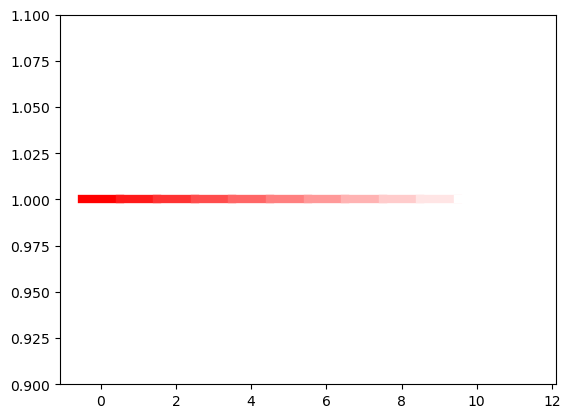

In [179]:
# Original color
original_color = 'red'  # Can be any color matplotlib understands

# Generate lighter versions
lighter_colors = [adjust_lightness(original_color, amount=1+(0.1*i)) for i in range(12)]

# Plotting to demonstrate the colors
for i, color in enumerate(lighter_colors):
    plt.plot([i-0.5, i+0.5], [1, 1], color=color, linewidth=6)  

plt.ylim(0.9, 1.1)
plt.show()

In [163]:
outcome_df

trial_outcome  velocity_bin  \
156           win             0   
157           win             1   
158           win             2   
159           win             3   

                       region_and_baseline_or_trial  \
156  MD_trial_velocity_parsed_window_averaged_power   
157  MD_trial_velocity_parsed_window_averaged_power   
158  MD_trial_velocity_parsed_window_averaged_power   
159  MD_trial_velocity_parsed_window_averaged_power   

                                                 power brain_region  \
156  [[0.014378295669285448, 0.015305386679455314, ...           MD   
157  [[0.050735821302542464, 0.05203986845364532, 0...           MD   
158  [[0.04824182039427767, 0.03439085762094281, 0....           MD   
159  [[0.04106349539523979, 0.04471883556177281, 0....           MD   

    trial_or_baseline                                         mean_power  \
156             trial  [0.01022638398880001, 0.012749822688856294, 0....   
157             trial  [0.01626936967994091, 0.0180048255872293, 0.02...   
158             trial  [0.01418130523510523, 0.012864387669837113, 0....   
159             trial  [0.01778245731722108, 0.022319418331097796, 0....   

                                             std_power  \
156  [0.022842571055716885, 0.02372200007590737, 0....   
157  [0.049089740455076525, 0.043779011858819626, 0...   
158  [0.015460371047051075, 0.010549837896057079, 0...   
159  [0.01673092875060471, 0.016344635766426512, 0....   

                                              n_trials  \
156  [92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 9...   
157  [48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 4...   
158  [24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 2...   
159  [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...   

                                             sem_power  
156  [0.0023815026596199513, 0.0024731894730448544,...  
157  [0.007085493716546824, 0.006318956070386333, 0...  
158  [0.003155835024947803, 0.00215347664286809, 0....  
159  [0.009659606217954078, 0.009436579859552733, 0...

In [172]:
BIN_TO_VELOCITY = {0: "0 to 2.5cm/s", 1: "2.5 to 5cm/s", 2: "5 to 10 cm/s", 3: "10cm/s+"}

In [165]:
OUTCOME_TO_COLOR

{'lose': 'red', 'omission': 'orange', 'rewarded': 'green', 'win': 'blue'}

In [166]:
grouped_all_trials_df.head()

trial_outcome  velocity_bin  \
0          lose             0   
1          lose             1   
2          lose             2   
3          lose             3   
4      omission             0   

                       region_and_baseline_or_trial  \
0  mPFC_trial_velocity_parsed_window_averaged_power   
1  mPFC_trial_velocity_parsed_window_averaged_power   
2  mPFC_trial_velocity_parsed_window_averaged_power   
3  mPFC_trial_velocity_parsed_window_averaged_power   
4  mPFC_trial_velocity_parsed_window_averaged_power   

                                               power brain_region  \
0  [[0.010234599238710826, 0.009366231284259053, ...         mPFC   
1  [[0.013833584504246519, 0.014530507389965114, ...         mPFC   
2  [[0.03963123259144771, 0.03165558654566546, 0....         mPFC   
3  [[0.0047511454863413604, 0.015700403701863784,...         mPFC   
4  [[0.02258350835989575, 0.02355255899717113, 0....         mPFC   

  trial_or_baseline                                         mean_power  \
0             trial  [0.01891495624590608, 0.02114256227286179, 0.0...   
1             trial  [0.015600753017007682, 0.01842456382954011, 0....   
2             trial  [0.01719302539978129, 0.017455315576698174, 0....   
3             trial  [0.01203788010746564, 0.016038257500336606, 0....   
4             trial  [0.02483009977385367, 0.02491870391941492, 0.0...   

                                           std_power  \
0  [0.03437053982794283, 0.026494911945311873, 0....   
1  [0.01898563580327672, 0.015706631358732136, 0....   
2  [0.023088077353077656, 0.017029764575193087, 0...   
3  [0.016996145046731425, 0.01731714976271093, 0....   
4  [0.06129572850439874, 0.0481991295329668, 0.05...   

                                            n_trials  \
0  [81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 8...   
1  [77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 7...   
2  [65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 6...   
3  [42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 4...   
4  [18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 1...   

                                           sem_power  
0  [0.003818948869771426, 0.002943879105034653, 0...  
1  [0.002163614000594156, 0.0017899367638801406, ...  
2  [0.002863723546664102, 0.002112282329200779, 0...  
3  [0.002622562117152274, 0.0026720942201815413, ...  
4  [0.014447541761076635, 0.011360643780016541, 0...

In [189]:
import colorsys

def generate_gradient_colors(base_color, num_colors=10):
    """
    Generate gradient colors based on a base color.
    
    :param base_color: The base color to create a gradient from.
    :param num_colors: The number of gradient colors to generate.
    :return: List of colors.
    """
    # Convert base color to HLS (Hue, Lightness, Saturation)
    h, l, s = colorsys.rgb_to_hls(*mcolors.to_rgb(base_color))

    # Determine the step size for lightness
    middle_index = num_colors // 2
    lightness_step = l / (middle_index if middle_index > 0 else 1)

    colors = []
    for i in range(num_colors):
        if i < middle_index:
            # For the lighter colors (before the middle)
            new_lightness = l + (middle_index - i) * lightness_step
        elif i == middle_index:
            # The middle color remains the base color
            new_lightness = l
        else:
            # For the darker colors (after the middle)
            new_lightness = l - (i - middle_index) * lightness_step

        # Ensure new lightness is within the valid range [0, 1]
        new_lightness = max(0, min(new_lightness, 1))

        new_color = colorsys.hls_to_rgb(h, new_lightness, s)
        colors.append(new_color)

    return colors



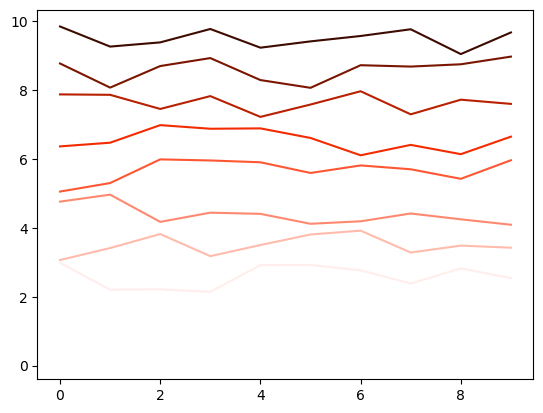

In [190]:
# Base color
base_color = '#ff5733'  # Reddish color

# Number of colors you want in the gradient
num_colors = 10

# Generate gradient colors
gradient_colors = generate_gradient_colors(base_color, num_colors)

# Set the color cycle to use the gradient colors
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=gradient_colors)

# Test by plotting some data
for i in range(num_colors):
    plt.plot(np.arange(10), np.random.rand(10) + i)

plt.show()

In [195]:
MERGED_LFP_AND_SLEAP

time                                     recording_file  \
0     30950500  20221214_125409_om_and_comp_6_1_top_1_base_2_v...   
1     32550496  20221214_125409_om_and_comp_6_1_top_1_base_2_v...   
2     34350494  20221214_125409_om_and_comp_6_1_top_1_base_2_v...   
3     35950496  20221214_125409_om_and_comp_6_1_top_1_base_2_v...   
4     37450494  20221214_125409_om_and_comp_6_1_top_1_base_2_v...   
...        ...                                                ...   
1107  65281838  20230621_111240_standard_comp_to_omission_D5_s...   
1108  66781856  20230621_111240_standard_comp_to_omission_D5_s...   
1109  68781880  20230621_111240_standard_comp_to_omission_D5_s...   
1110  70681909  20230621_111240_standard_comp_to_omission_D5_s...   
1111  71681918  20230621_111240_standard_comp_to_omission_D5_s...   

      video_number current_subject  \
0              1.0             6.1   
1              1.0             6.1   
2              1.0             6.1   
3              1.0             6.1   
4              1.0             6.1   
...            ...             ...   
1107           1.0             1.4   
1108           1.0             1.4   
1109           1.0             1.4   
1110           1.0             1.4   
1111           1.0             1.4   

                                mPFC_baseline_lfp_trace  \
0     [-0.33054966, -0.41988742, -0.9134785, -1.4964...   
1     [1.1479901, 1.0943874, 1.0251507, 0.8330745, 0...   
2     [-0.23897848, 0.36181787, 0.122839406, -0.1474...   
3     [0.49582452, 0.18537582, 0.4042533, 0.24344537...   
4     [-3.7477186, -3.0575845, -2.521558, -2.6644983...   
...                                                 ...   
1107  [0.2565, -0.019, 0.038, 0.0095, -0.41483334, -...   
1108  [0.437, 0.399, 0.29133335, 0.041166667, -0.272...   
1109  [0.66816664, 0.025333334, -0.6586667, -1.07033...   
1110  [-2.7898333, -3.1825, -4.2496667, -4.157833, -...   
1111  [-0.66816664, -0.1805, 0.44016665, 0.38633335,...   

                                   mPFC_trial_lfp_trace  \
0     [0.51145864, 0.29928145, 0.22111093, 0.1116721...   
1     [0.32384935, 0.1630414, 0.0044668876, 0.062536...   
2     [-0.14964072, 0.4355215, 0.6074967, 0.317149, ...   
3     [-0.33948344, 0.01786755, 0.13624007, -0.12060...   
4     [-3.055351, -3.1044867, -2.4121192, -2.083803,...   
...                                                 ...   
1107  [-2.3781667, -2.2863333, -1.5326667, -1.051333...   
1108  [-2.5206666, -2.3053334, -1.6941667, -1.060833...   
1109  [-1.8873333, -1.4756666, -1.1463333, -0.421166...   
1110  [0.041166667, 0.228, 0.27233332, -0.342, -0.95...   
1111  [-0.06016667, 0.52566665, 0.969, 1.0703334, 0....   

                                vHPC_baseline_lfp_trace  \
0     [0.27216667, -0.26033333, -0.8307, -1.0484333,...   
1     [1.9016167, 2.1146166, 2.2791, 2.3856, 2.43056...   
2     [-1.0034667, -0.7076333, -0.69816667, -0.67923...   
3     [0.6023167, 0.48398334, 0.22601667, 0.04496666...   
4     [-1.4259167, -1.3856833, -1.1265334, -0.91235,...   
...                                                 ...   
1107  [-0.5318638, -0.7494444, -0.73010397, -0.60439...   
1108  [-0.8171362, -0.7566971, -0.69625807, -0.70351...   
1109  [-0.43032616, -0.34087634, -0.22483334, -0.217...   
1110  [0.7446093, 0.77603763, 0.73252153, 1.0057061,...   
1111  [0.42549103, 0.8558172, 1.1652652, 0.8944982, ...   

                                   vHPC_trial_lfp_trace  \
0     [-1.1513833, -1.1845167, -1.14665, -1.1431, -1...   
1     [-1.0224, -0.9159, -0.9963667, -0.9774333, -0....   
2     [0.48753333, 0.355, 0.19643334, 0.18696667, 0....   
3     [0.1704, 0.059166666, -0.13845, -0.35026667, -...   
4     [-4.0848665, -4.2718334, -3.9487834, -3.480183...   
...                                                 ...   
1107  [-0.8364767, -1.0564749, -0.9380143, -0.744609...   
1108  [-2.0500932, -1.8615233, -1.3828459, -0.998453...   
1109  [-1.946138, -1.9437205, -1.8953692, -1.8180071...   
1110  [

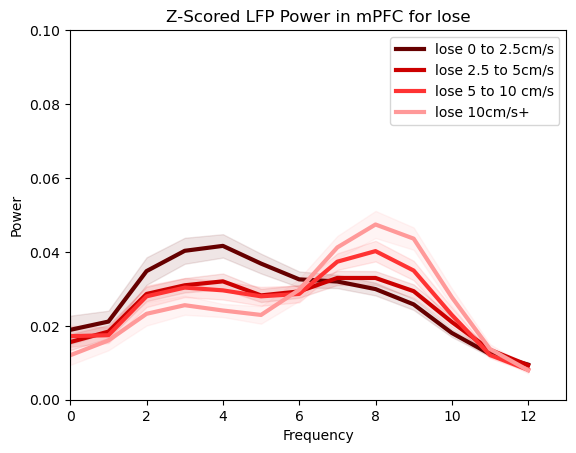

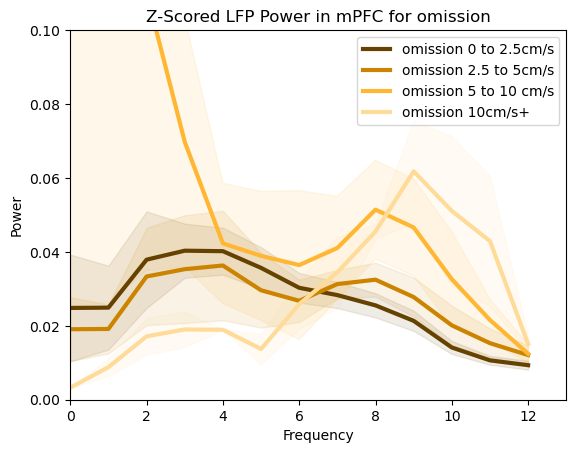

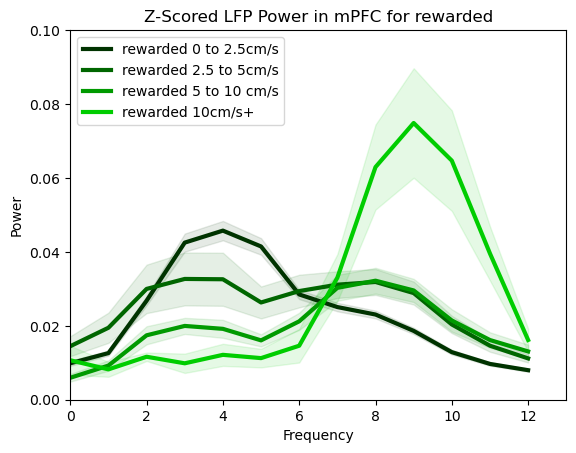

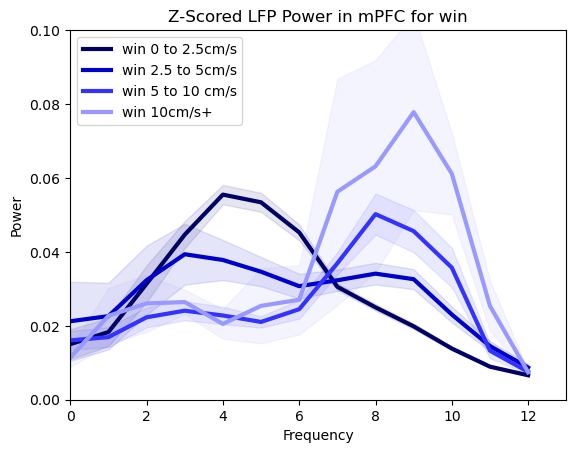

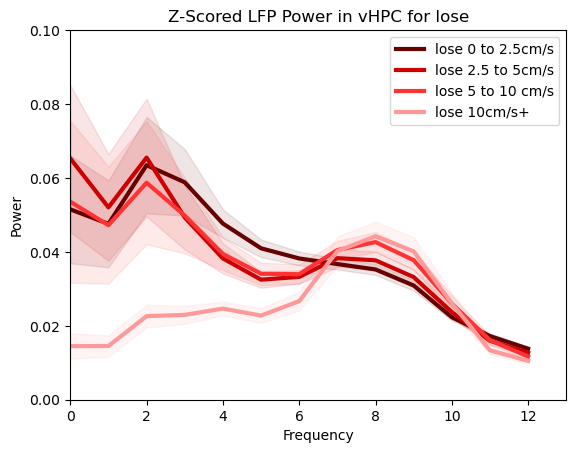

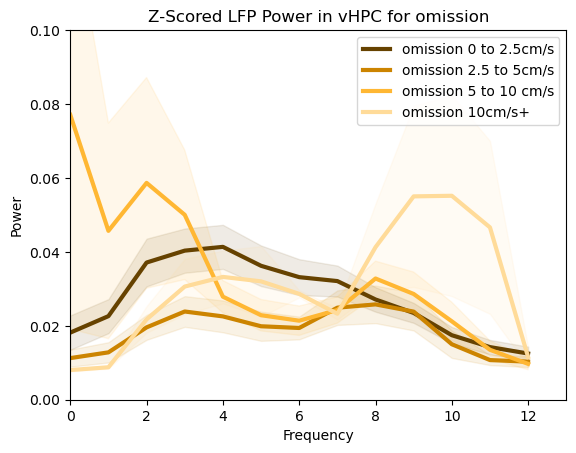

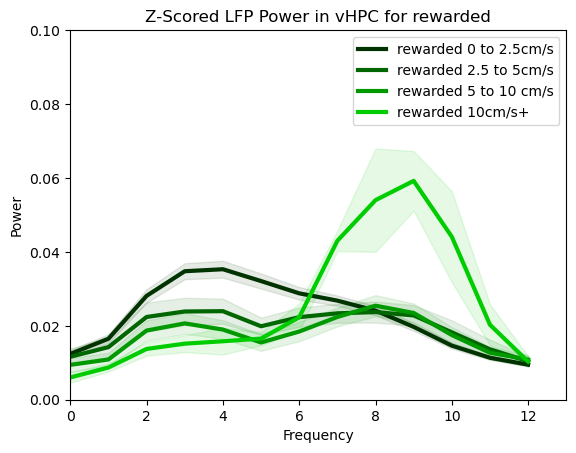

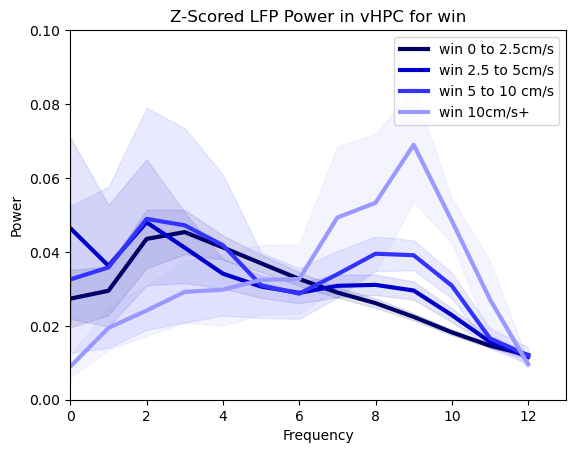

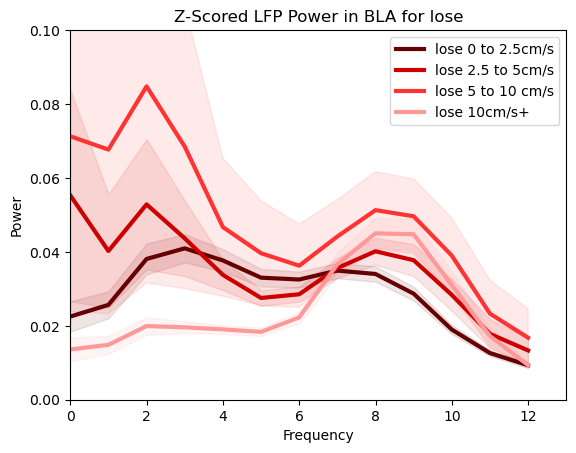

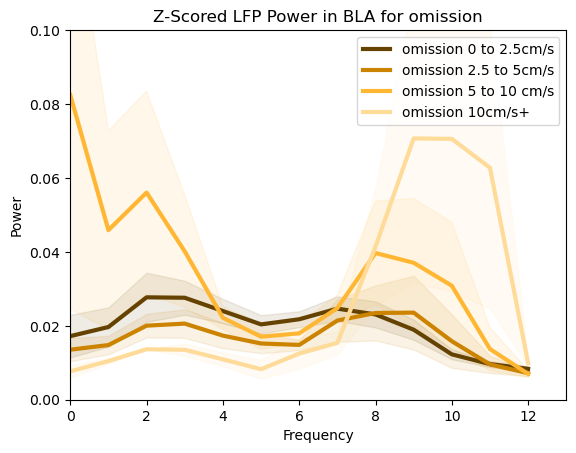

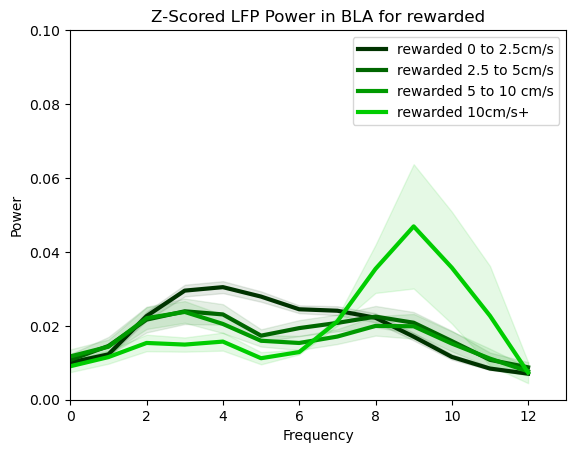

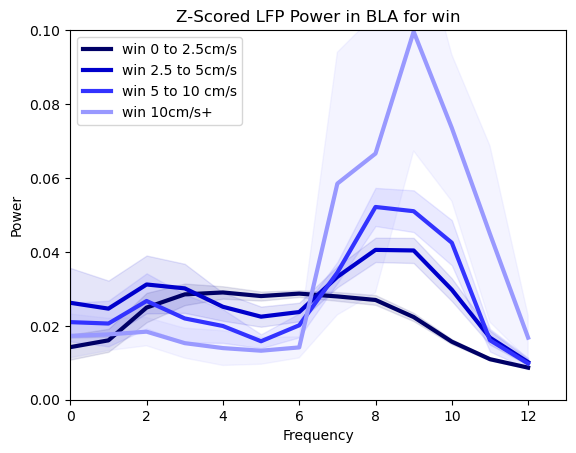

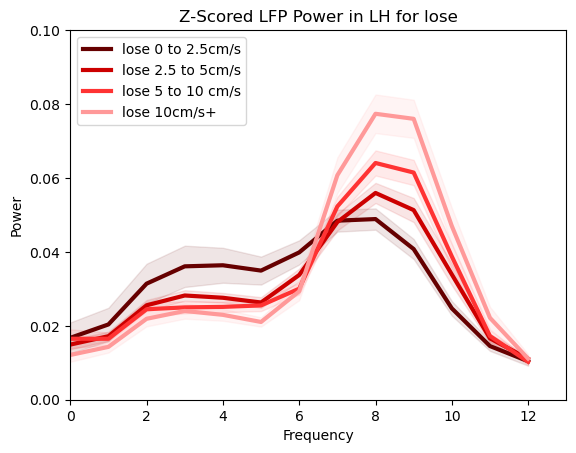

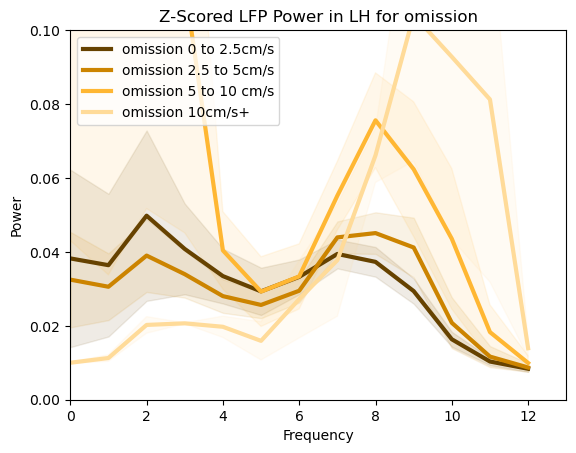

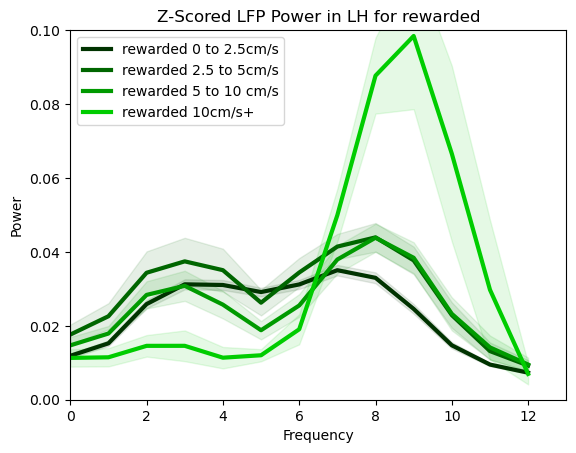

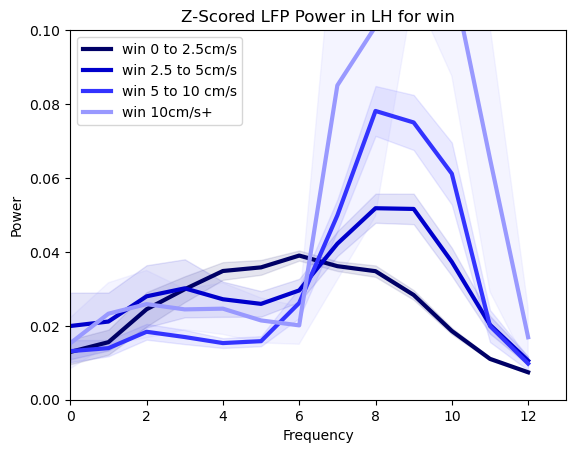

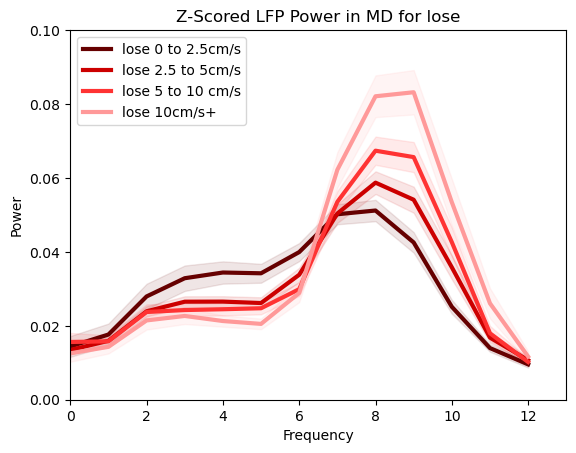

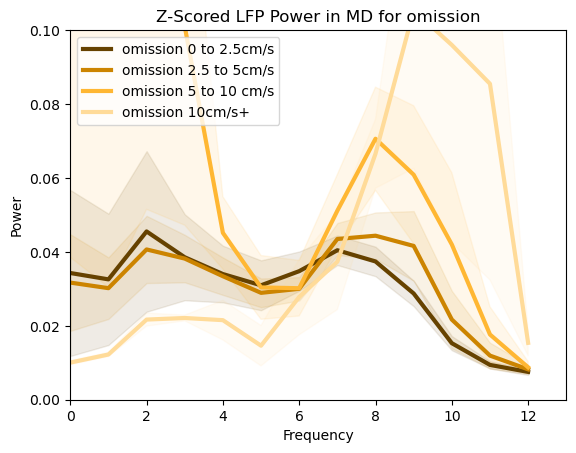

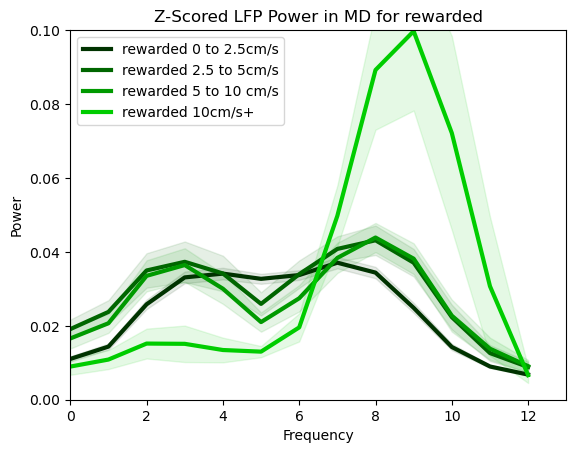

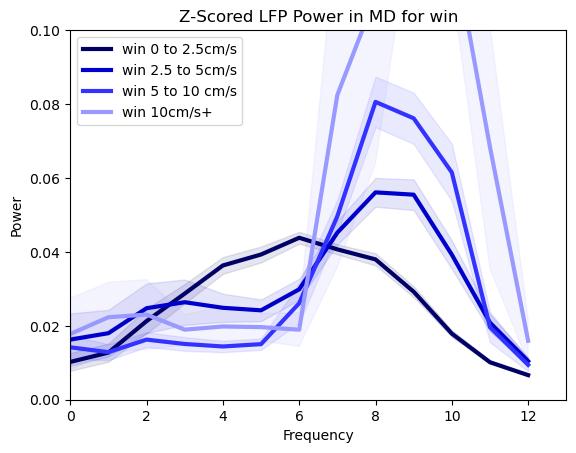

In [213]:
low_freq = 0
high_freq = 13
for region in grouped_all_trials_df["region_and_baseline_or_trial"].unique():
    region_df = grouped_all_trials_df[grouped_all_trials_df["region_and_baseline_or_trial"] == region]

    for outcome in region_df["trial_outcome"].unique():
        fig, ax = plt.subplots()
        plt.title("Z-Scored LFP Power in {} for {}".format(region.split("_")[0], outcome))
        plt.xlabel("Frequency")
        plt.ylabel("Power")
        plt.xlim(low_freq, high_freq) 
        # plt.yscale("log")
        plt.ylim(0, 0.1)
        outcome_df = region_df[(region_df["trial_outcome"] == outcome)]
        # Generate gradient colors
        gradient_colors = generate_gradient_colors(OUTCOME_TO_COLOR[outcome], 20)
        
        for index, row in outcome_df.iterrows():           
            current_frequencies = all_frequencies[low_freq: high_freq]
            mean_power = row["mean_power"][low_freq: high_freq]
            sem_power = row["sem_power"][low_freq: high_freq]
                
            
            try:
                ax = sns.lineplot(x=current_frequencies, y=mean_power, \
                label="{} {}".format(outcome, BIN_TO_VELOCITY[row["velocity_bin"]]), linewidth=3, color=gradient_colors[-(row["velocity_bin"]+1) *4])
                
                plt.fill_between(current_frequencies, 
                mean_power - sem_power, mean_power + sem_power, \
                alpha=0.1, color=gradient_colors[-(row["velocity_bin"]+1) *4])
            
            except Exception as e: 
                print(e)
                continue
        plt.legend()
        plt.savefig("./proc/velocity_parsed_power/rce_velocity_parsed_lfp_power_freq_{}_to_{}_region_{}_{}.png".format(low_freq, high_freq, region.split("_")[0], outcome))

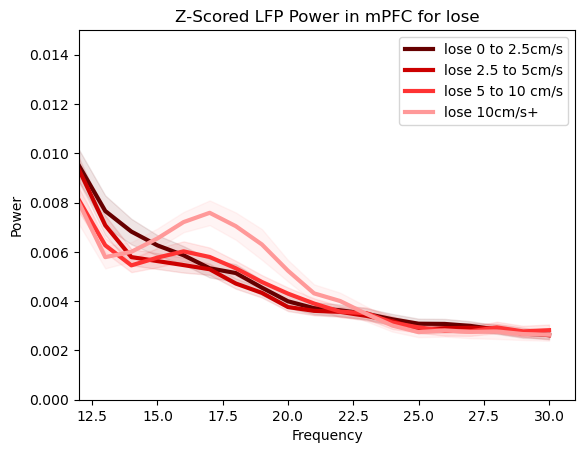

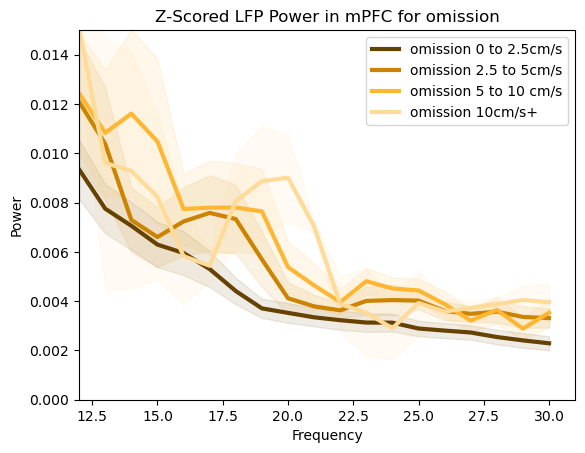

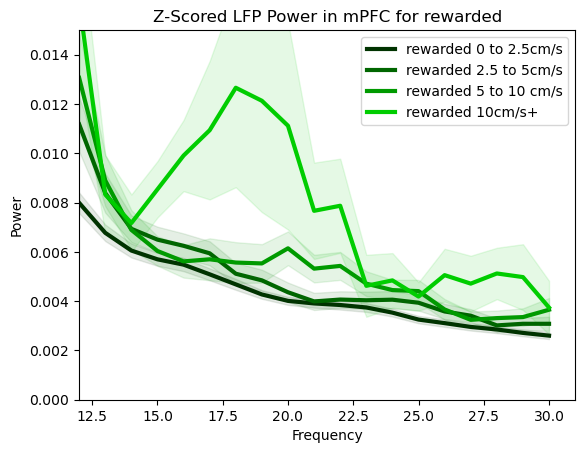

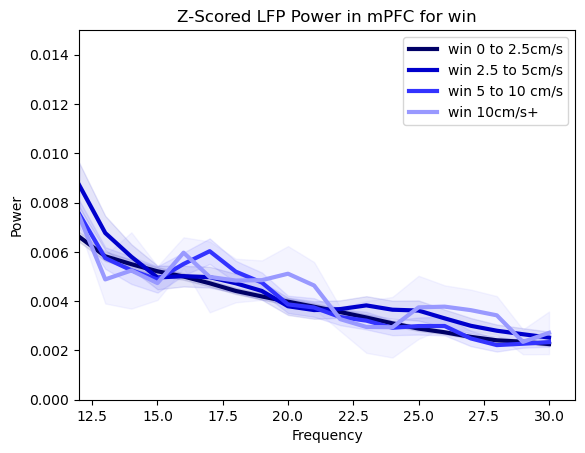

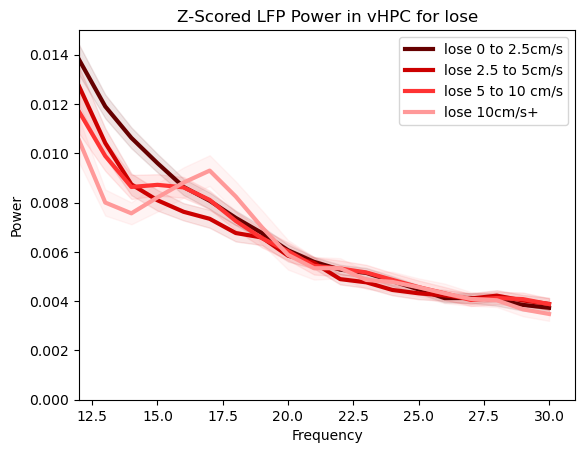

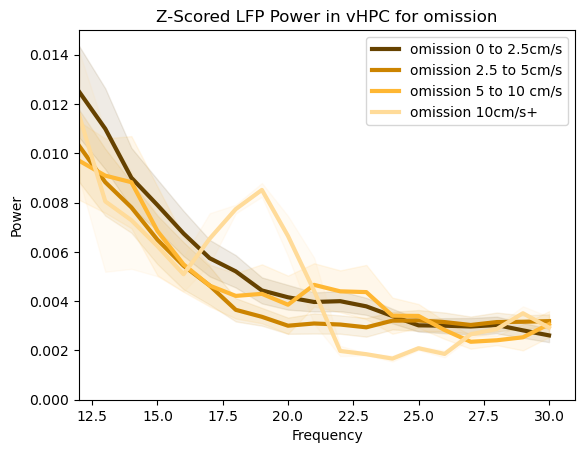

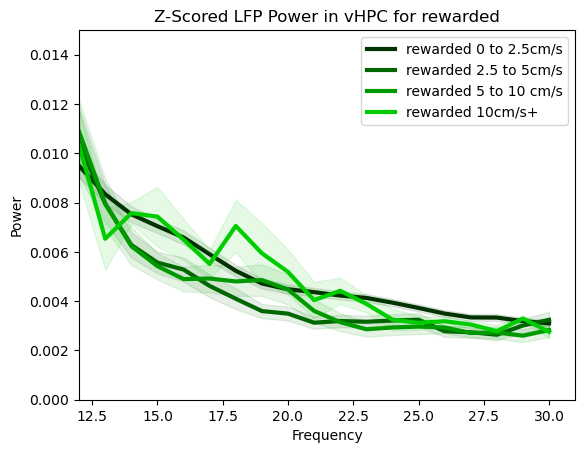

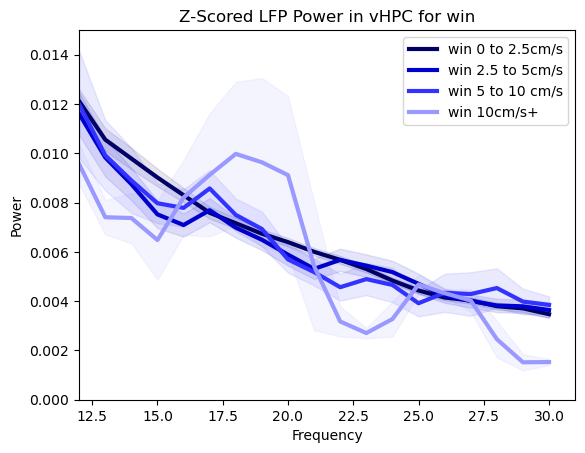

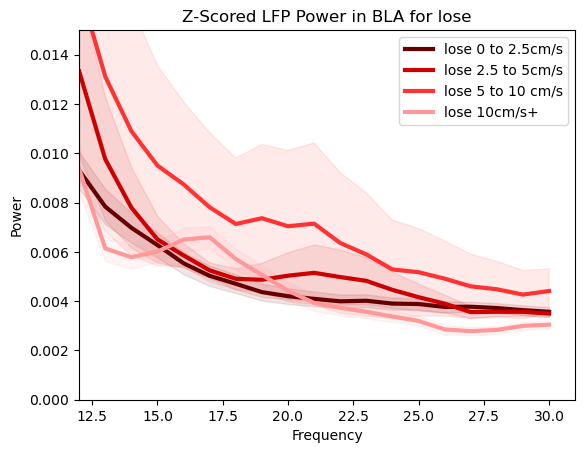

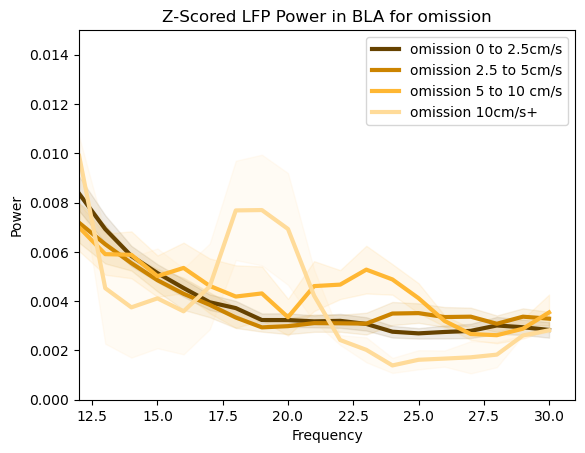

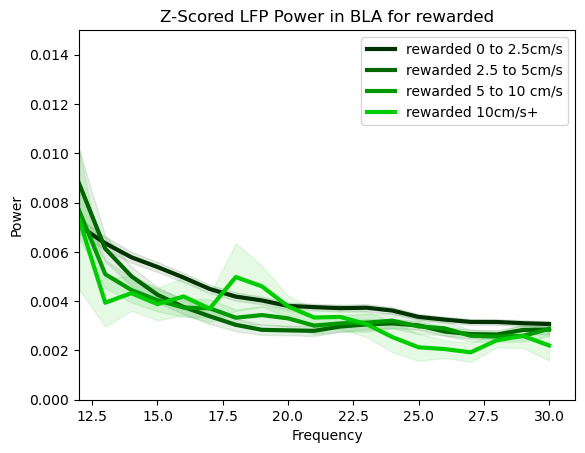

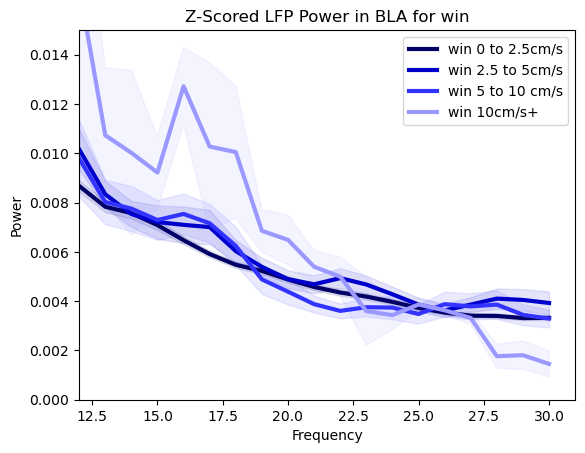

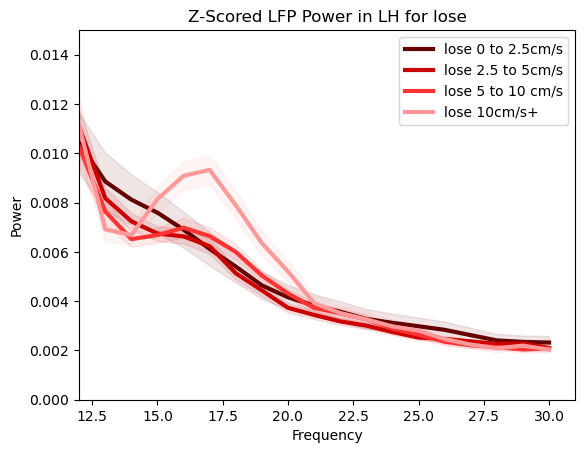

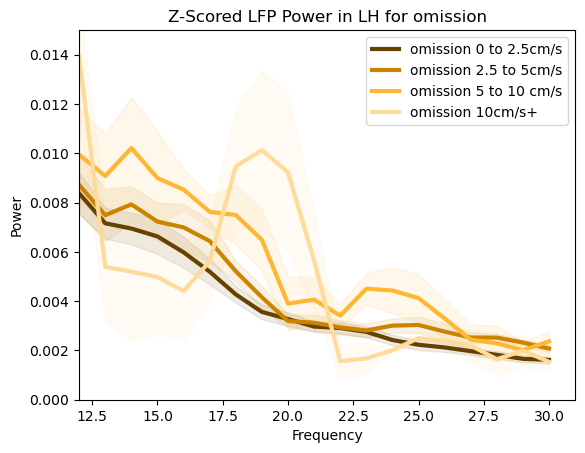

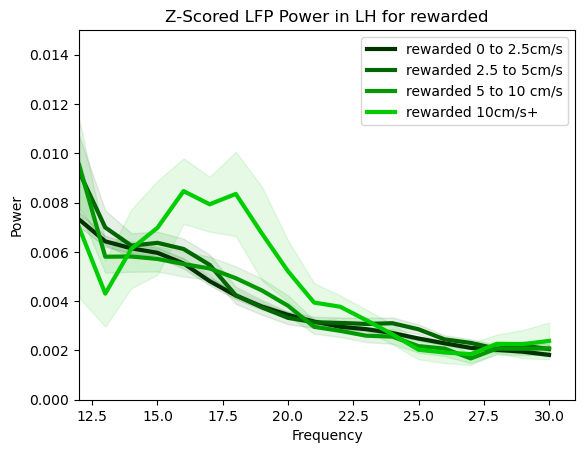

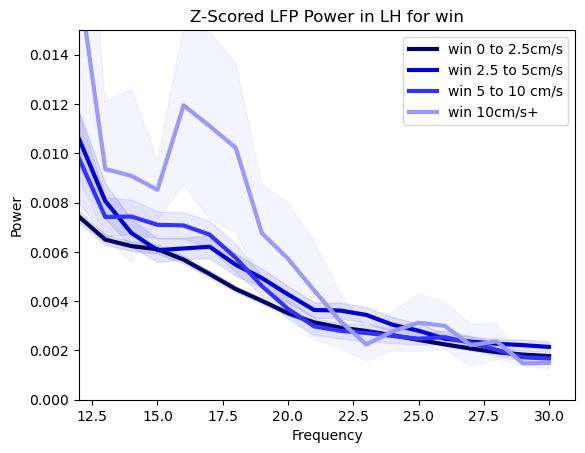

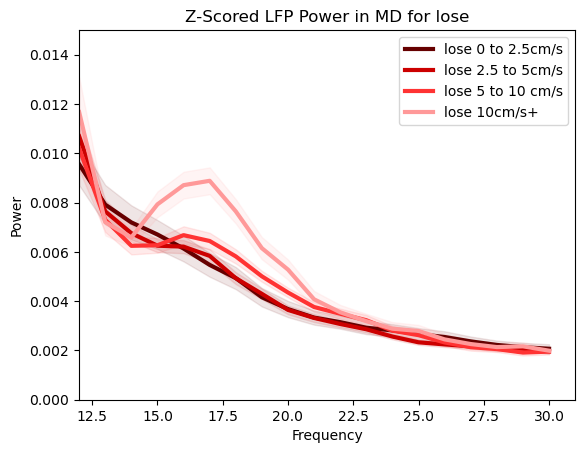

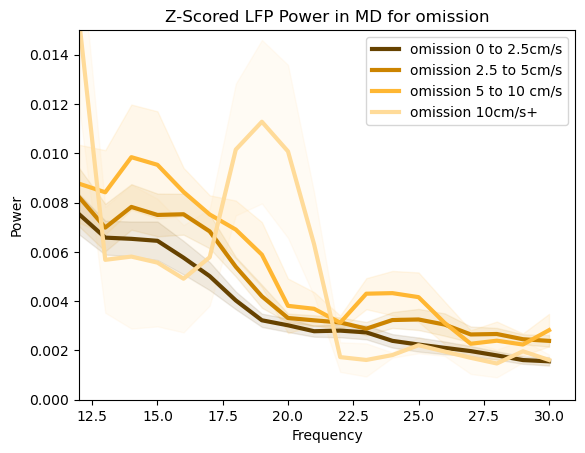

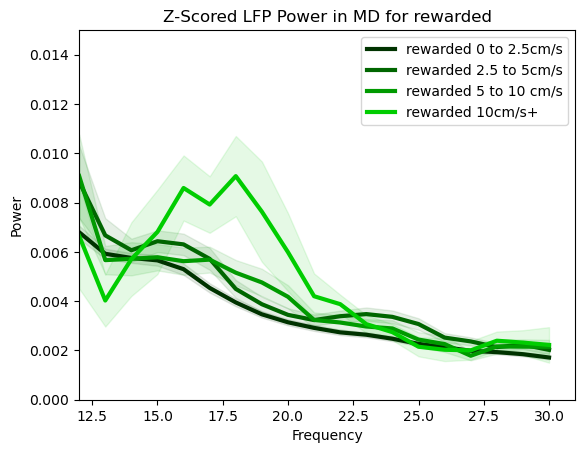

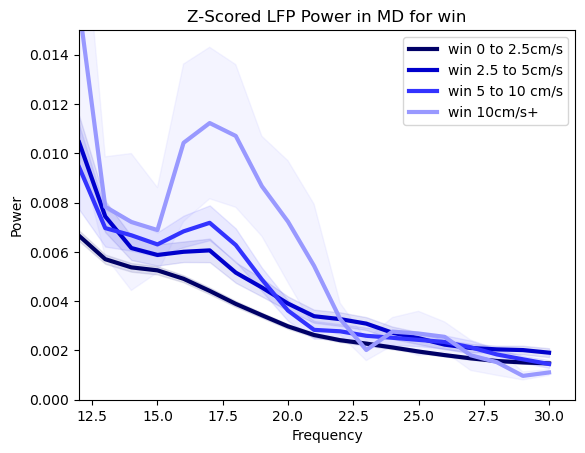

In [225]:
low_freq = 12
high_freq = 31
for region in grouped_all_trials_df["region_and_baseline_or_trial"].unique():
    region_df = grouped_all_trials_df[grouped_all_trials_df["region_and_baseline_or_trial"] == region]

    for outcome in region_df["trial_outcome"].unique():
        fig, ax = plt.subplots()
        plt.title("Z-Scored LFP Power in {} for {}".format(region.split("_")[0], outcome))
        plt.xlabel("Frequency")
        plt.ylabel("Power")
        plt.xlim(low_freq, high_freq) 
        # plt.yscale("log")
        plt.ylim(0, 0.015)
        
        outcome_df = region_df[(region_df["trial_outcome"] == outcome)]
        # Generate gradient colors
        gradient_colors = generate_gradient_colors(OUTCOME_TO_COLOR[outcome], 20)
        
        for index, row in outcome_df.iterrows():           
            current_frequencies = all_frequencies[low_freq: high_freq]
            mean_power = row["mean_power"][low_freq: high_freq]
            sem_power = row["sem_power"][low_freq: high_freq]
                
            
            try:
                ax = sns.lineplot(x=current_frequencies, y=mean_power, \
                label="{} {}".format(outcome, BIN_TO_VELOCITY[row["velocity_bin"]]), linewidth=3, color=gradient_colors[-(row["velocity_bin"]+1) *4])
                
                plt.fill_between(current_frequencies, 
                mean_power - sem_power, mean_power + sem_power, \
                alpha=0.1, color=gradient_colors[-(row["velocity_bin"]+1) *4])
            
            except Exception as e: 
                print(e)
                continue
        plt.legend()
        plt.savefig("./proc/velocity_parsed_power/rce_velocity_parsed_lfp_power_freq_{}_to_{}_region_{}_{}.png".format(low_freq, high_freq, region.split("_")[0], outcome))

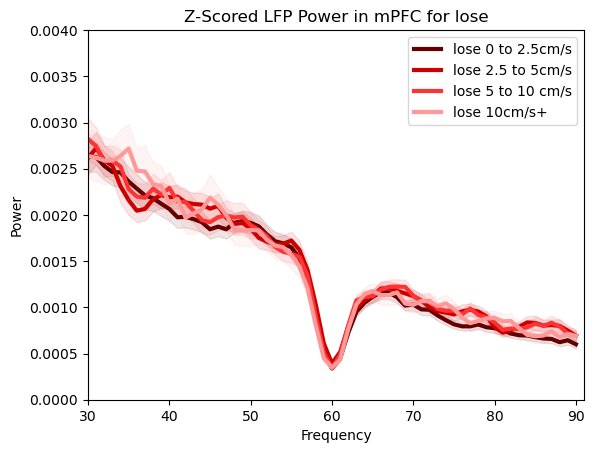

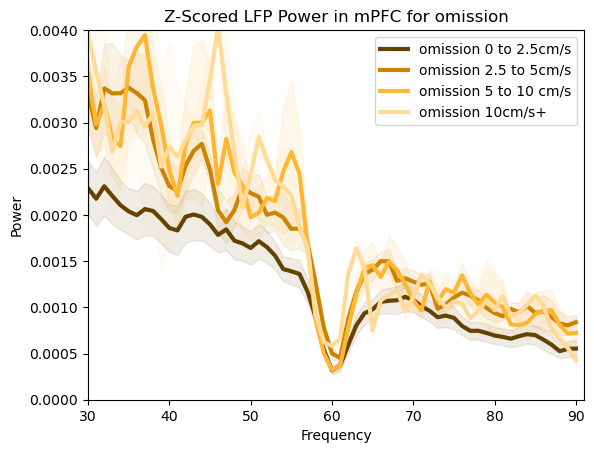

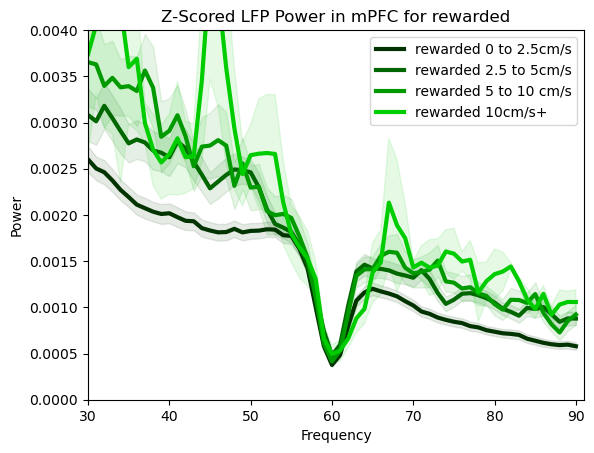

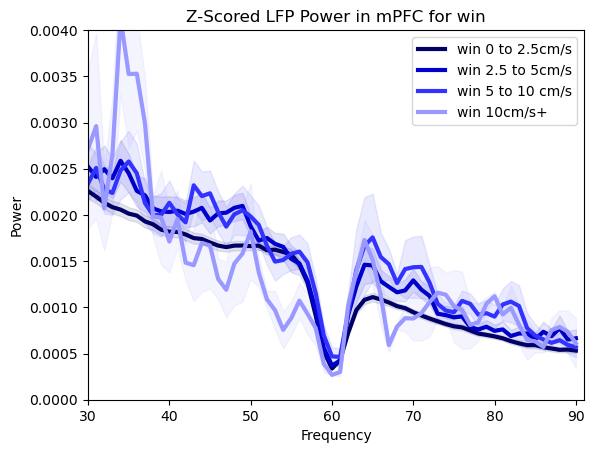

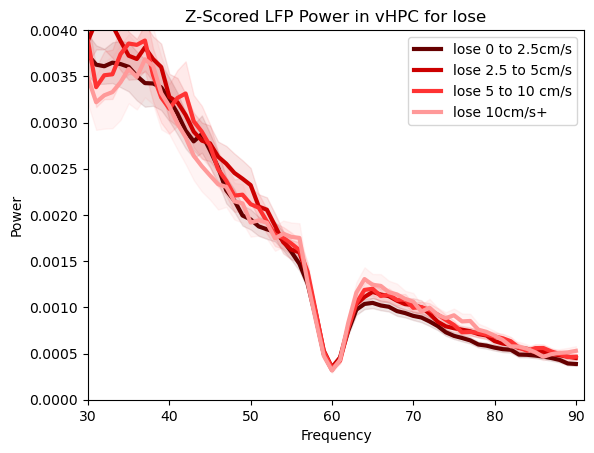

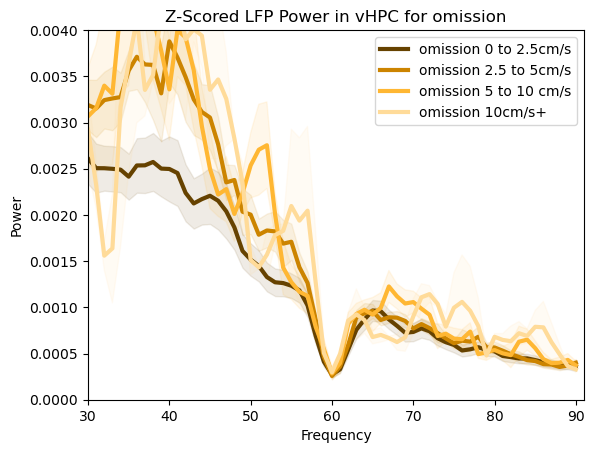

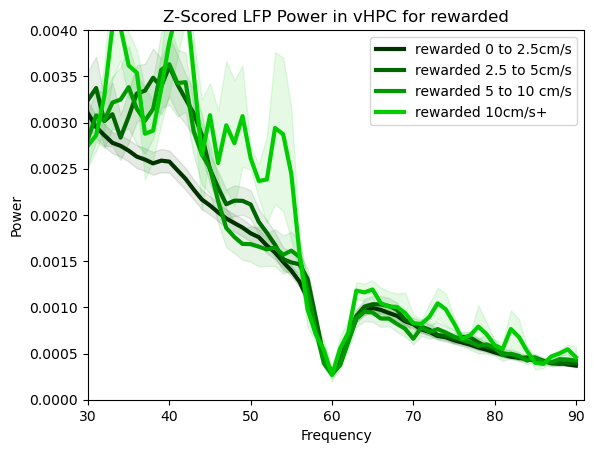

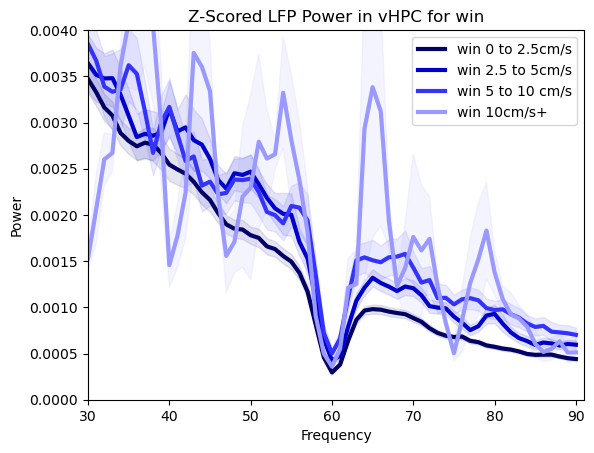

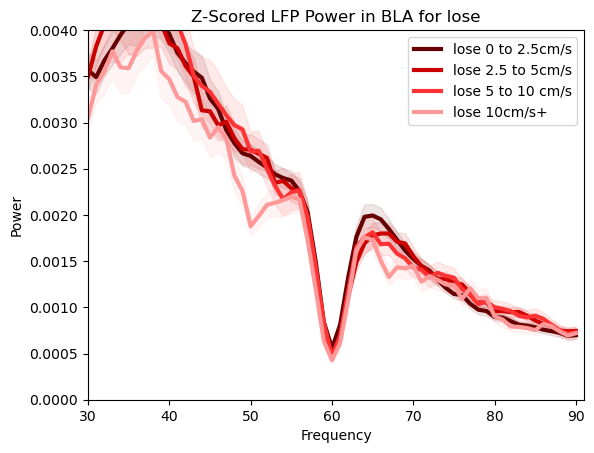

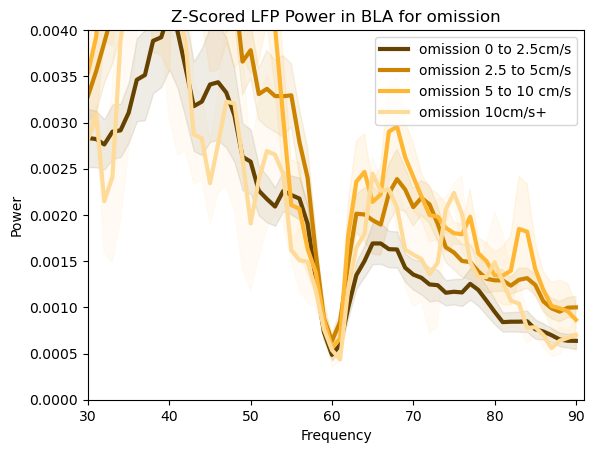

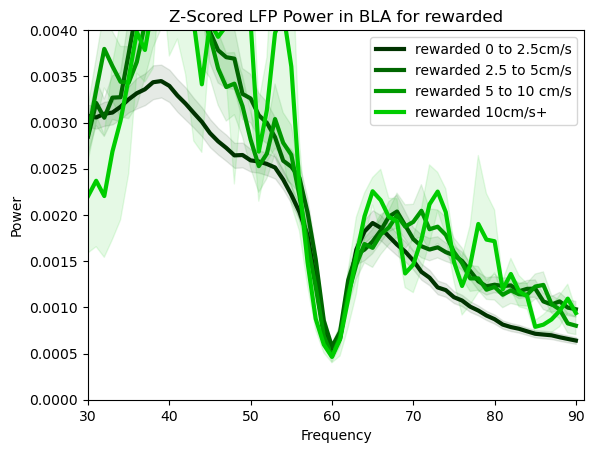

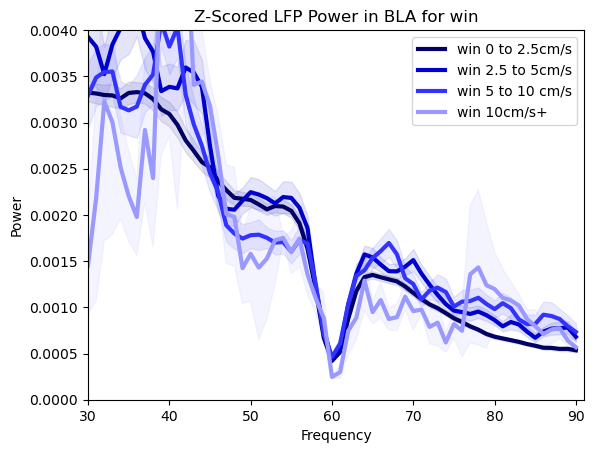

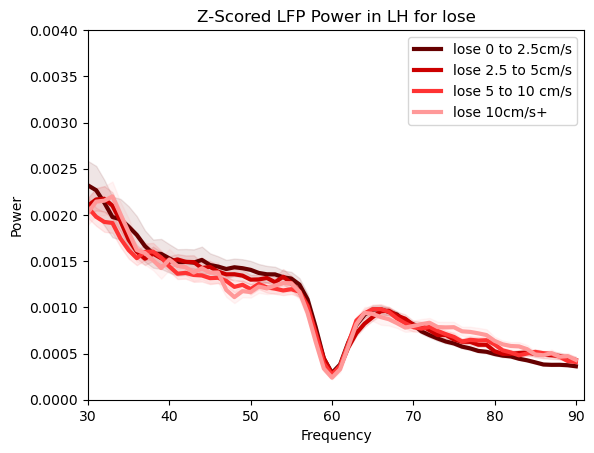

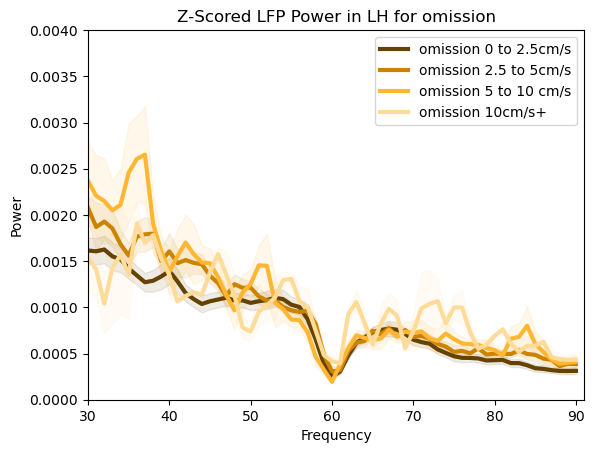

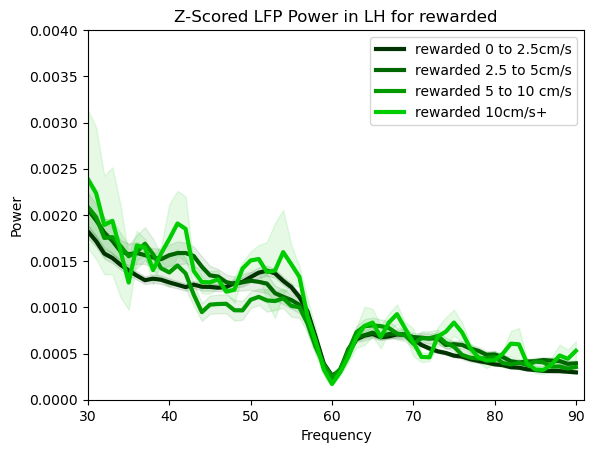

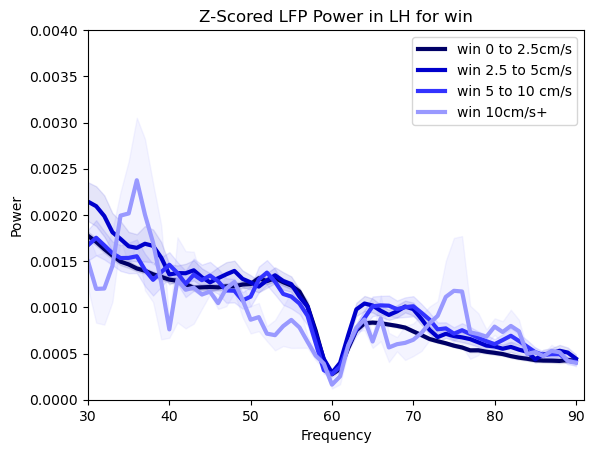

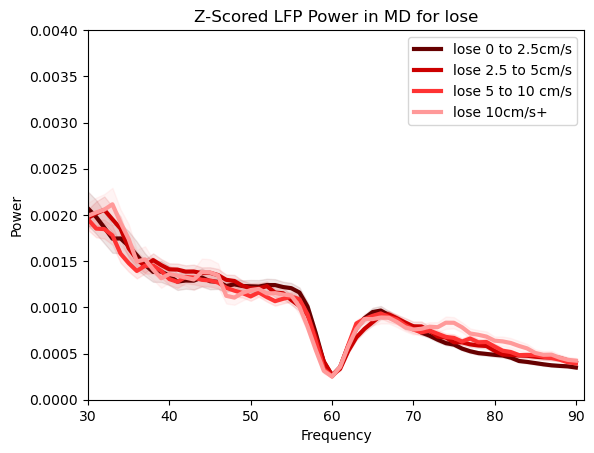

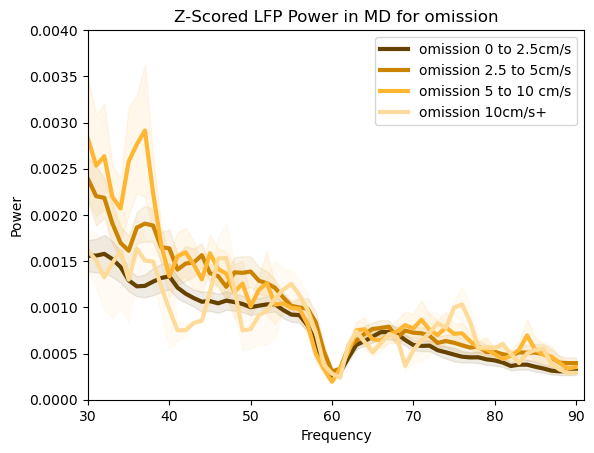

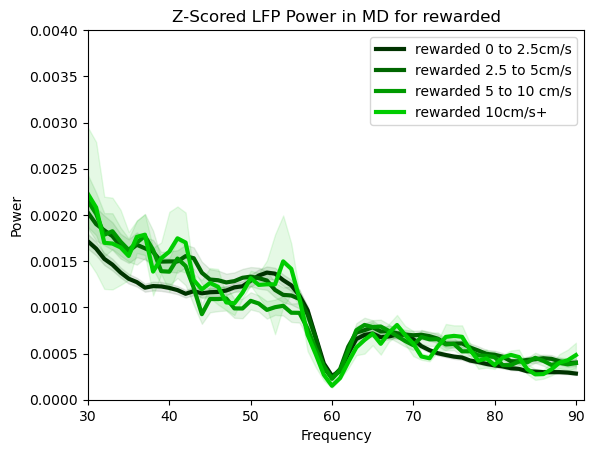

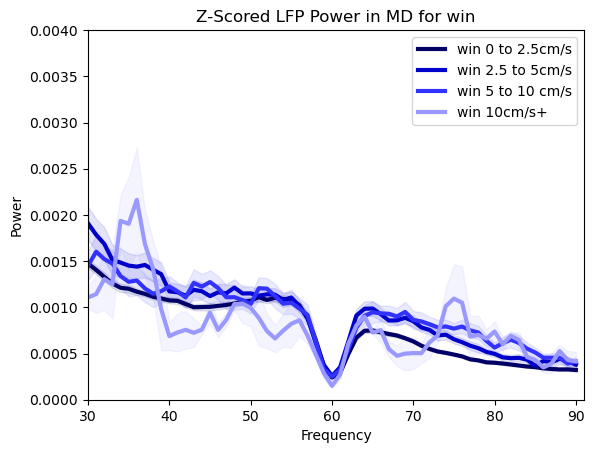

In [227]:
low_freq = 30
high_freq = 91
for region in grouped_all_trials_df["region_and_baseline_or_trial"].unique():
    region_df = grouped_all_trials_df[grouped_all_trials_df["region_and_baseline_or_trial"] == region]

    for outcome in region_df["trial_outcome"].unique():
        fig, ax = plt.subplots()
        plt.title("Z-Scored LFP Power in {} for {}".format(region.split("_")[0], outcome))
        plt.xlabel("Frequency")
        plt.ylabel("Power")
        plt.xlim(low_freq, high_freq) 
        # plt.yscale("log")
        plt.ylim(0, 0.004)
        outcome_df = region_df[(region_df["trial_outcome"] == outcome)]
        # Generate gradient colors
        gradient_colors = generate_gradient_colors(OUTCOME_TO_COLOR[outcome], 20)
        
        for index, row in outcome_df.iterrows():           
            current_frequencies = all_frequencies[low_freq: high_freq]
            mean_power = row["mean_power"][low_freq: high_freq]
            sem_power = row["sem_power"][low_freq: high_freq]
                
            
            try:
                ax = sns.lineplot(x=current_frequencies, y=mean_power, \
                label="{} {}".format(outcome, BIN_TO_VELOCITY[row["velocity_bin"]]), linewidth=3, color=gradient_colors[-(row["velocity_bin"]+1) *4])
                
                plt.fill_between(current_frequencies, 
                mean_power - sem_power, mean_power + sem_power, \
                alpha=0.1, color=gradient_colors[-(row["velocity_bin"]+1) *4])
            
            except Exception as e: 
                print(e)
                continue
        plt.legend()
        plt.savefig("./proc/velocity_parsed_power/rce_velocity_parsed_lfp_power_freq_{}_to_{}_region_{}_{}.png".format(low_freq, high_freq, region.split("_")[0], outcome))

In [197]:
import collections

In [199]:
MERGED_TRIALS_AND_VIDEO["bin_counts"] = MERGED_TRIALS_AND_VIDEO["binned_trial_thorax_velocity"].apply(lambda x: collections.Counter(x))

In [200]:
MERGED_TRIALS_AND_VIDEO

time                                      recording_dir  \
0    30950500            20221214_125409_om_and_comp_6_1_and_6_3   
1    32550496            20221214_125409_om_and_comp_6_1_and_6_3   
2    34350494            20221214_125409_om_and_comp_6_1_and_6_3   
3    35950496            20221214_125409_om_and_comp_6_1_and_6_3   
4    37450494            20221214_125409_om_and_comp_6_1_and_6_3   
..        ...                                                ...   
273  65281838  20230621_111240_standard_comp_to_omission_D5_s...   
274  66781856  20230621_111240_standard_comp_to_omission_D5_s...   
275  68781880  20230621_111240_standard_comp_to_omission_D5_s...   
276  70681909  20230621_111240_standard_comp_to_omission_D5_s...   
277  71681918  20230621_111240_standard_comp_to_omission_D5_s...   

                                        recording_file  time_stamp_index  \
0    20221214_125409_om_and_comp_6_1_top_1_base_2_v...          27998597   
1    20221214_125409_om_and_comp_6_1_top_1_base_2_v...          29598593   
2    20221214_125409_om_and_comp_6_1_top_1_base_2_v...          31398591   
3    20221214_125409_om_and_comp_6_1_top_1_base_2_v...          32998593   
4    20221214_125409_om_and_comp_6_1_top_1_base_2_v...          34498591   
..                                                 ...               ...   
273  20230621_111240_standard_comp_to_omission_D5_s...          62088794   
274  20230621_111240_standard_comp_to_omission_D5_s...          63588812   
275  20230621_111240_standard_comp_to_omission_D5_s...          65588836   
276  20230621_111240_standard_comp_to_omission_D5_s...          67488865   
277  20230621_111240_standard_comp_to_omission_D5_s...          68488874   

                                            video_file  video_frame  \
0    20221214_125409_om_and_comp_6_1_and_6_3.1.vide...        28574   
1    20221214_125409_om_and_comp_6_1_and_6_3.1.vide...        30569   
2    20221214_125409_om_and_comp_6_1_and_6_3.1.vide...        32813   
3    20221214_125409_om_and_comp_6_1_and_6_3.1.vide...        34807   
4    20221214_125409_om_and_comp_6_1_and_6_3.1.vide...        36677   
..                                                 ...          ...   
273  20230621_111240_standard_comp_to_omission_D5_s...        62056   
274  20230621_111240_standard_comp_to_omission_D5_s...        63554   
275  20230621_111240_standard_comp_to_omission_D5_s...        65550   
276  20230621_111240_standard_comp_to_omission_D5_s...        67447   
277  20230621_111240_standard_comp_to_omission_D5_s...        68444   

     video_number             subject_info competition_closeness  \
0             1.0  6_1_top_1_base_2_vs_6_3          win_non_comp   
1             1.0  6_1_top_1_base_2_vs_6_3          win_non_comp   
2             1.0  6_1_top_1_base_2_vs_6_3          win_non_comp   
3             1.0  6_1_top_1_base_2_vs_6_3          win_non_comp   
4             1.0  6_1_top_1_base_2_vs_6_3          win_non_comp   
..            ...                      ...                   ...   
273           1.0           1-4_t3b3L_box1              rewarded   
274           1.0           1-4_t3b3L_box1              rewarded   
275           1.0           1-4_t3b3L_box1              rewarded   
276           1.0           1-4_t3b3L_box1              omission   
277           1.0           1-4_t3b3L_box1              rewarded   

                                            video_name  ...  \
0            20221214_125409_om_and_comp_6_1_and_6_3.1  ...   
1            20221214_125409_om_and_comp_6_1_and_6_3.1  ...   
2            20221214_125409_om_and_comp_6_1_and_6_3.1  ...   
3            20221214_125409_om_and_comp_6_1_and_6_3.1  ...   
4            20221214_125409_om_and_comp_6_1_and_6_3.1  ...   
..                                                 ...  ...   
273  20230621_111240_standard_comp_to_omission_D5_s...  ...   
274  20230621_111240_standard_comp_to_omission_D5_s...  ...   
275  20230621_111240_standard_comp_to_omis

In [132]:
outcome_df

trial_outcome  velocity_bin  \
144          lose             0   
145          lose             1   
146          lose             2   
147          lose             3   

                       region_and_baseline_or_trial  \
144  MD_trial_velocity_parsed_window_averaged_power   
145  MD_trial_velocity_parsed_window_averaged_power   
146  MD_trial_velocity_parsed_window_averaged_power   
147  MD_trial_velocity_parsed_window_averaged_power   

                                                 power brain_region  \
144  [[0.006007474525527098, 0.007577216616492338, ...           MD   
145  [[0.023316335103614715, 0.02177968950358495, 0...           MD   
146  [[0.04263619041151166, 0.036998469633354826, 0...           MD   
147  [[0.002207857711779865, 0.015385282539111582, ...           MD   

    trial_or_baseline                                         mean_power  \
144             trial  [0.014411088046556154, 0.01763791294351297, 0....   
145             trial  [0.01345266305897527, 0.015944174367291303, 0....   
146             trial  [0.015623565961212511, 0.01580295553376924, 0....   
147             trial  [0.01255371847902534, 0.014308976224474669, 0....   

                                             std_power  \
144  [0.02533768672137009, 0.026722805141872936, 0....   
145  [0.010182259472060428, 0.00964596857101568, 0....   
146  [0.01964349673631113, 0.013436887079164652, 0....   
147  [0.014815115917872634, 0.011689158887580701, 0...   

                                              n_trials  \
144  [81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 8...   
145  [77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 7...   
146  [65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 6...   
147  [42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 4...   

                                             sem_power  
144  [0.002815298524596677, 0.002969200571319215, 0...  
145  [0.0011603761590976151, 0.001099260138864497, ...  
146  [0.0024364759040923336, 0.001666640722569352, ...  
147  [0.0022860220162044596, 0.0018036763745928619,...

In [205]:
MERGED_TRIALS_AND_VIDEO = pd.concat([MERGED_TRIALS_AND_VIDEO.drop(['bin_counts'], axis=1), MERGED_TRIALS_AND_VIDEO['bin_counts'].apply(pd.Series)], axis=1)

In [202]:
def mean_of_counter(counter):
    # Extract values from the Counter and calculate the mean
    values = list(counter.values())
    return sum(values) / len(values) if values else 0  # Prevent division by zero

In [206]:
MERGED_TRIALS_AND_VIDEO

time                                      recording_dir  \
0    30950500            20221214_125409_om_and_comp_6_1_and_6_3   
1    32550496            20221214_125409_om_and_comp_6_1_and_6_3   
2    34350494            20221214_125409_om_and_comp_6_1_and_6_3   
3    35950496            20221214_125409_om_and_comp_6_1_and_6_3   
4    37450494            20221214_125409_om_and_comp_6_1_and_6_3   
..        ...                                                ...   
273  65281838  20230621_111240_standard_comp_to_omission_D5_s...   
274  66781856  20230621_111240_standard_comp_to_omission_D5_s...   
275  68781880  20230621_111240_standard_comp_to_omission_D5_s...   
276  70681909  20230621_111240_standard_comp_to_omission_D5_s...   
277  71681918  20230621_111240_standard_comp_to_omission_D5_s...   

                                        recording_file  time_stamp_index  \
0    20221214_125409_om_and_comp_6_1_top_1_base_2_v...          27998597   
1    20221214_125409_om_and_comp_6_1_top_1_base_2_v...          29598593   
2    20221214_125409_om_and_comp_6_1_top_1_base_2_v...          31398591   
3    20221214_125409_om_and_comp_6_1_top_1_base_2_v...          32998593   
4    20221214_125409_om_and_comp_6_1_top_1_base_2_v...          34498591   
..                                                 ...               ...   
273  20230621_111240_standard_comp_to_omission_D5_s...          62088794   
274  20230621_111240_standard_comp_to_omission_D5_s...          63588812   
275  20230621_111240_standard_comp_to_omission_D5_s...          65588836   
276  20230621_111240_standard_comp_to_omission_D5_s...          67488865   
277  20230621_111240_standard_comp_to_omission_D5_s...          68488874   

                                            video_file  video_frame  \
0    20221214_125409_om_and_comp_6_1_and_6_3.1.vide...        28574   
1    20221214_125409_om_and_comp_6_1_and_6_3.1.vide...        30569   
2    20221214_125409_om_and_comp_6_1_and_6_3.1.vide...        32813   
3    20221214_125409_om_and_comp_6_1_and_6_3.1.vide...        34807   
4    20221214_125409_om_and_comp_6_1_and_6_3.1.vide...        36677   
..                                                 ...          ...   
273  20230621_111240_standard_comp_to_omission_D5_s...        62056   
274  20230621_111240_standard_comp_to_omission_D5_s...        63554   
275  20230621_111240_standard_comp_to_omission_D5_s...        65550   
276  20230621_111240_standard_comp_to_omission_D5_s...        67447   
277  20230621_111240_standard_comp_to_omission_D5_s...        68444   

     video_number             subject_info competition_closeness  \
0             1.0  6_1_top_1_base_2_vs_6_3          win_non_comp   
1             1.0  6_1_top_1_base_2_vs_6_3          win_non_comp   
2             1.0  6_1_top_1_base_2_vs_6_3          win_non_comp   
3             1.0  6_1_top_1_base_2_vs_6_3          win_non_comp   
4             1.0  6_1_top_1_base_2_vs_6_3          win_non_comp   
..            ...                      ...                   ...   
273           1.0           1-4_t3b3L_box1              rewarded   
274           1.0           1-4_t3b3L_box1              rewarded   
275           1.0           1-4_t3b3L_box1              rewarded   
276           1.0           1-4_t3b3L_box1              omission   
277           1.0           1-4_t3b3L_box1              rewarded   

                                            video_name  ...  \
0            20221214_125409_om_and_comp_6_1_and_6_3.1  ...   
1            20221214_125409_om_and_comp_6_1_and_6_3.1  ...   
2            20221214_125409_om_and_comp_6_1_and_6_3.1  ...   
3            20221214_125409_om_and_comp_6_1_and_6_3.1  ...   
4            20221214_125409_om_and_comp_6_1_and_6_3.1  ...   
..                                                 ...  ...   
273  20230621_111240_standard_comp_to_omission_D5_s...  ...   
274  20230621_111240_standard_comp_to_omission_D5_s...  ...   
275  20230621_111240_standard_comp_to_omis

# Drawing plots all together

In [129]:
all_frequencies = MERGED_LFP_AND_SLEAP["BLA_baseline_frequencies"].iloc[0]



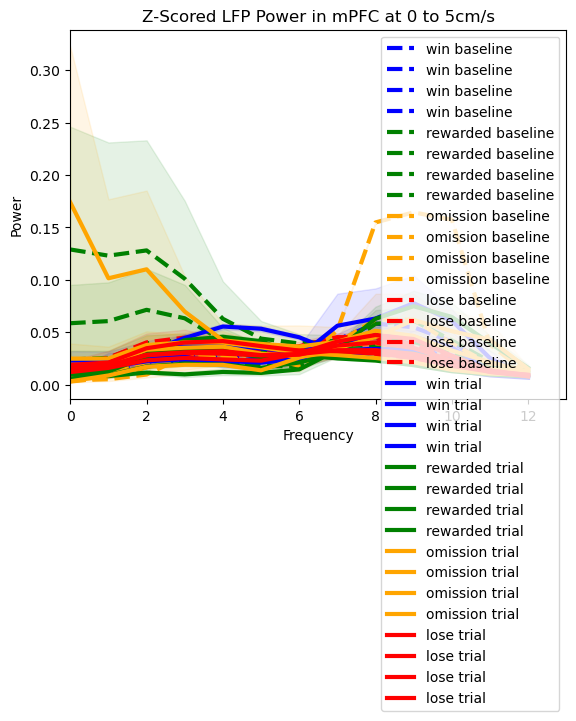

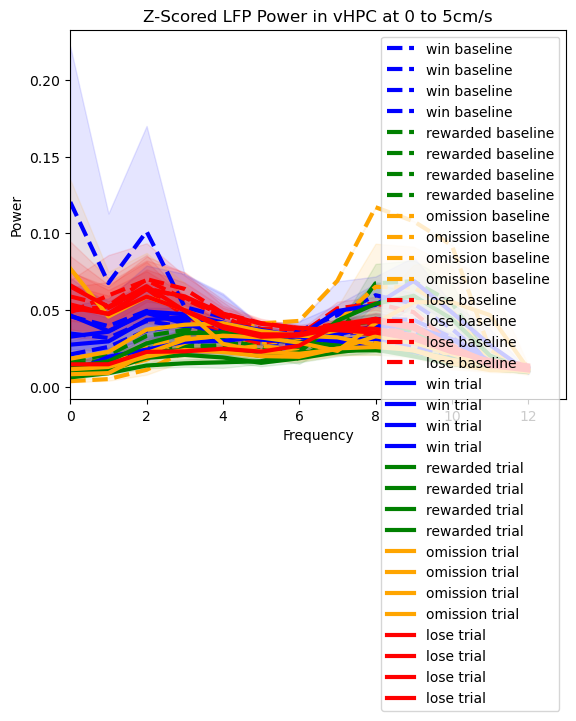

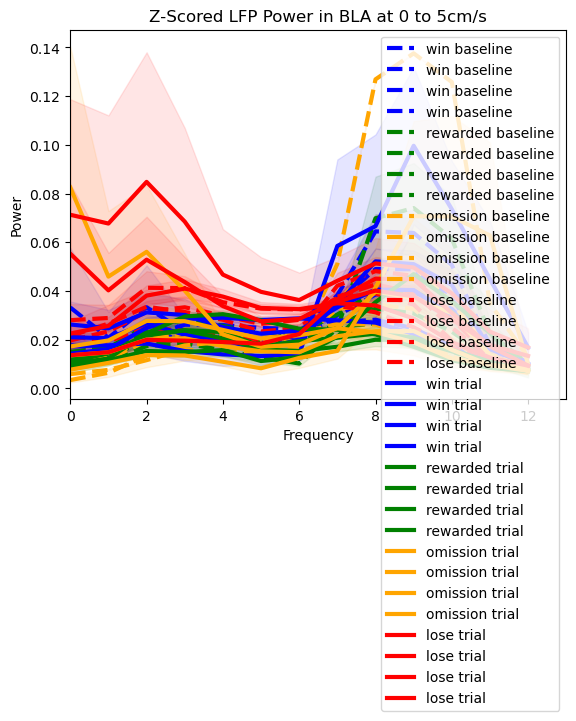

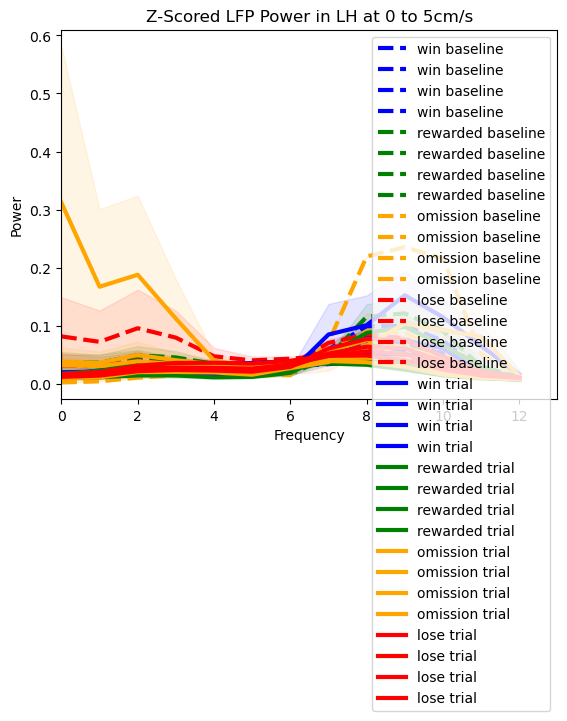

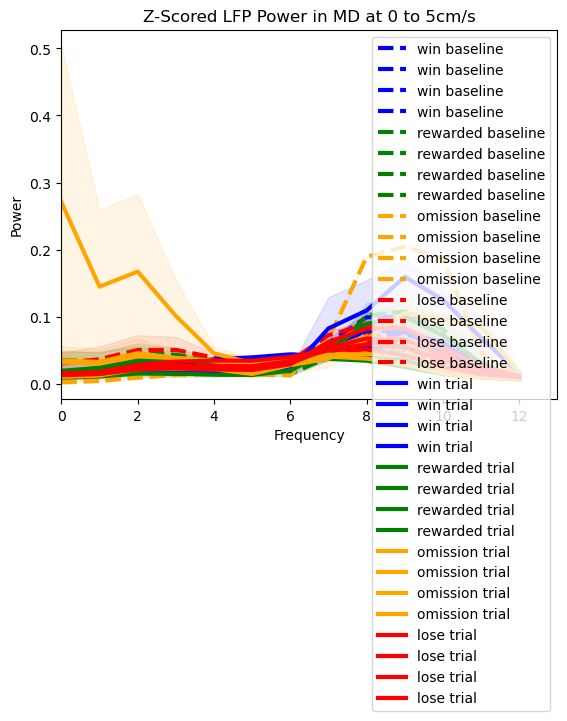

In [130]:
low_freq = 0
high_freq = 13
for region in grouped_all_trials_df["brain_region"].unique():
    region_df = grouped_all_trials_df[grouped_all_trials_df["brain_region"] == region]
    
    fig, ax = plt.subplots()
    plt.title("Z-Scored LFP Power in {} at 0 to 5cm/s".format(region.split("_")[-1]))
    plt.xlabel("Frequency")
    plt.ylabel("Power")
    plt.xlim(low_freq, high_freq) 
    # plt.yscale("log")
    # plt.ylim(0, 0.02)

    for trial_or_baseline, outcome in itertools.product(region_df["trial_or_baseline"].unique(), sorted(region_df["trial_outcome"].unique())[::-1]):
        outcome_df = region_df[(region_df["trial_or_baseline"] == trial_or_baseline) & (region_df["trial_outcome"] == outcome)]
        for index, row in outcome_df.iterrows():
            current_frequencies = all_frequencies[low_freq: high_freq]
            mean_power = row["mean_power"][low_freq: high_freq]
            sem_power = row["sem_power"][low_freq: high_freq]
            try:
                ax = sns.lineplot(x=current_frequencies, y=mean_power, \
                label="{} {}".format(outcome, trial_or_baseline), color=OUTCOME_TO_COLOR[outcome], \
                linestyle=TRIAL_OR_BASELINE_TO_STYLE[trial_or_baseline], linewidth=3)
                
                plt.fill_between(current_frequencies, 
                mean_power - sem_power, mean_power + sem_power, \
                alpha=0.1, color=OUTCOME_TO_COLOR[outcome])
            
            except Exception as e: 
                print(e)
                continue
    plt.legend()
    # plt.savefig("./proc/velocity_parsing/plot_region_line_trialoutcome_baselinetrial/\
    # rce_lower_velocity_lfp_power_trialoutcome_baselinetrial_freq_{}_to_{}_region_{}.png".format(low_freq, high_freq, region.split("_")[-1]))

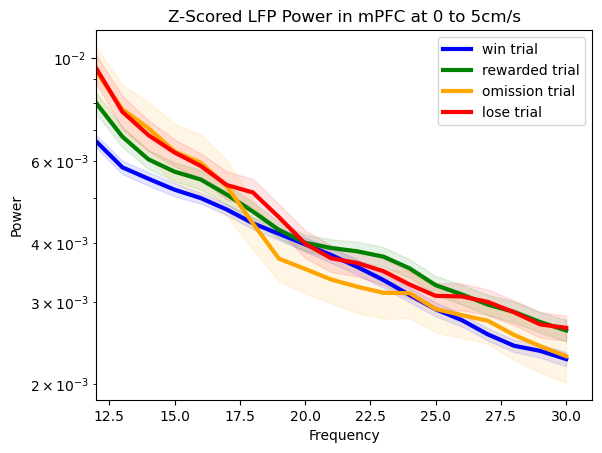

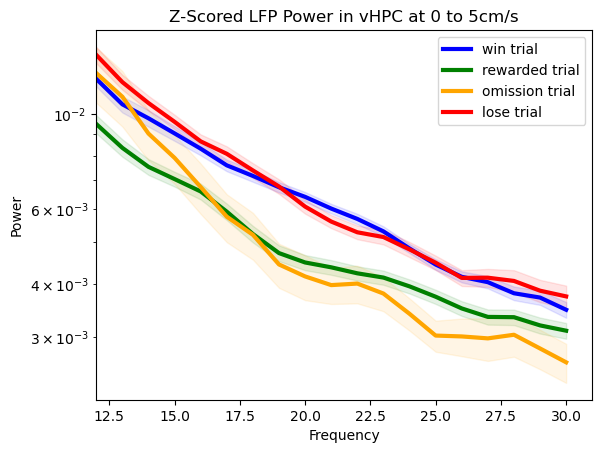

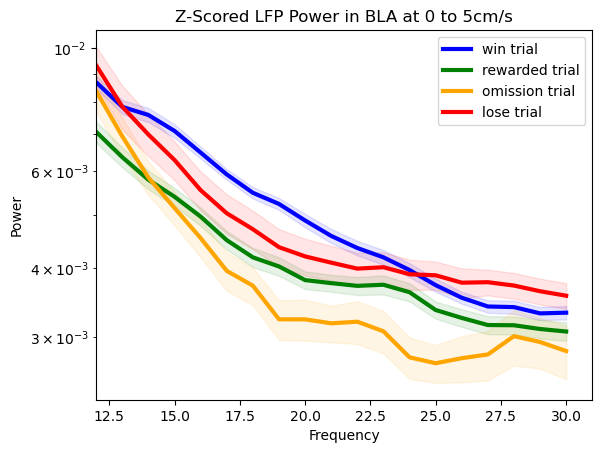

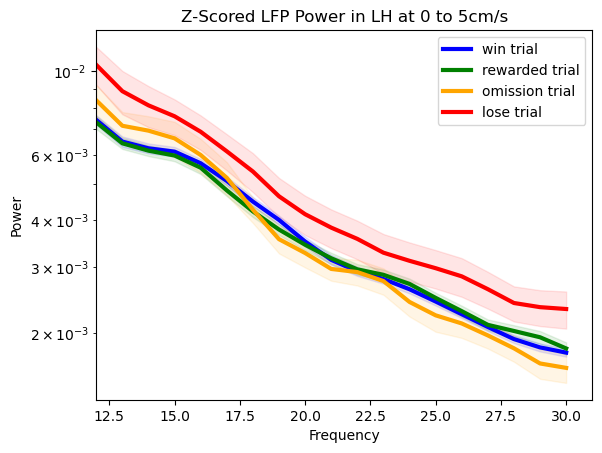

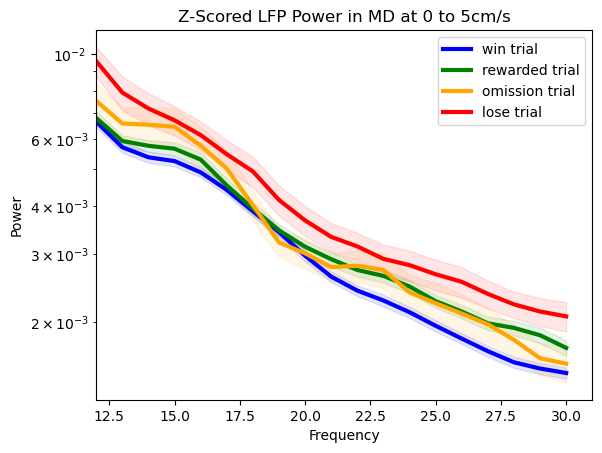

In [76]:
low_freq = 12
high_freq = 31
for region in grouped_all_trials_df["brain_region"].unique():
    region_df = grouped_all_trials_df[grouped_all_trials_df["brain_region"] == region]
    
    fig, ax = plt.subplots()
    plt.title("Z-Scored LFP Power in {} at 0 to 5cm/s".format(region.split("_")[-1]))
    plt.xlabel("Frequency")
    plt.ylabel("Power")
    plt.xlim(low_freq, high_freq) 
    plt.yscale("log")
    # plt.ylim(0, 0.02)

    for trial_or_baseline, outcome in itertools.product(region_df["trial_or_baseline"].unique(), sorted(region_df["trial_outcome"].unique())[::-1]):
        outcome_df = region_df[(region_df["trial_or_baseline"] == trial_or_baseline) & (region_df["trial_outcome"] == outcome)]
        for index, row in outcome_df.iterrows():
            current_frequencies = all_frequencies[low_freq: high_freq]
            mean_power = row["mean_power"][low_freq: high_freq]
            sem_power = row["sem_power"][low_freq: high_freq]
            try:
                ax = sns.lineplot(x=current_frequencies, y=mean_power, \
                label="{} {}".format(outcome, trial_or_baseline), color=OUTCOME_TO_COLOR[outcome], \
                linestyle=TRIAL_OR_BASELINE_TO_STYLE[trial_or_baseline], linewidth=3)
                
                plt.fill_between(current_frequencies, 
                mean_power - sem_power, mean_power + sem_power, \
                alpha=0.1, color=OUTCOME_TO_COLOR[outcome])
            
            except Exception as e: 
                print(e)
                continue
    plt.legend()
    # plt.savefig("./proc/velocity_parsing/plot_region_line_trialoutcome_baselinetrial/\
    # rce_lower_velocity_lfp_power_trialoutcome_baselinetrial_freq_{}_to_{}_region_{}.png".format(low_freq, high_freq, region.split("_")[-1]))

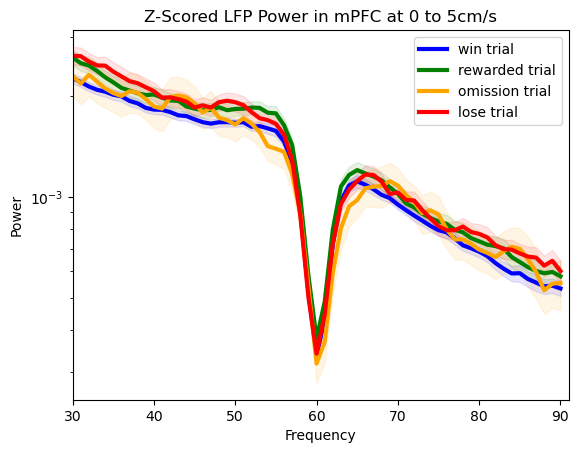

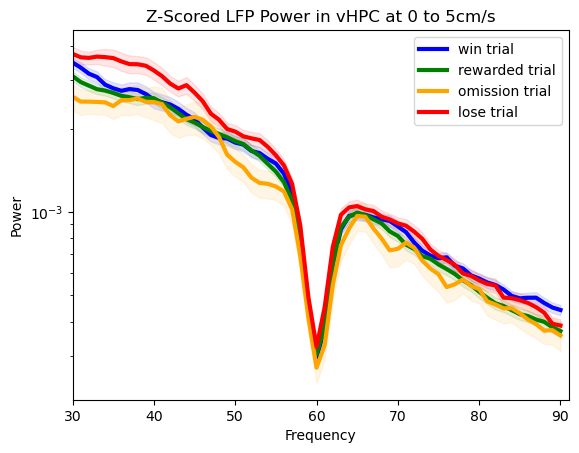

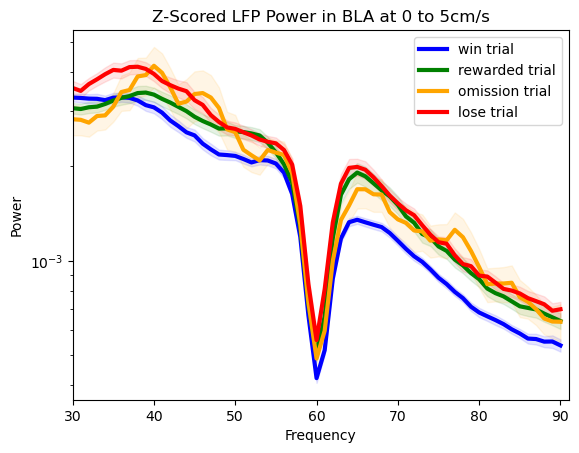

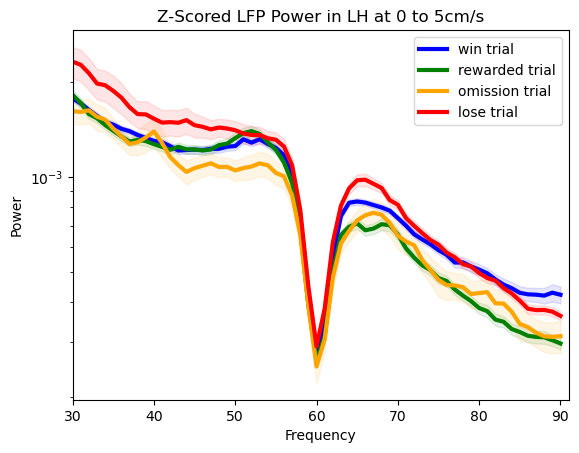

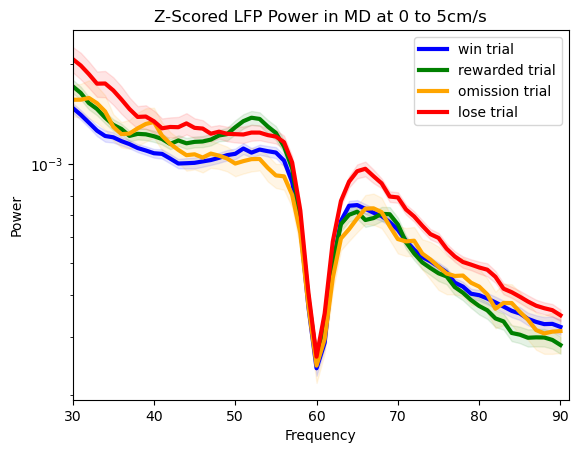

In [77]:
low_freq = 30
high_freq = 91
for region in grouped_all_trials_df["brain_region"].unique():
    region_df = grouped_all_trials_df[grouped_all_trials_df["brain_region"] == region]
    
    fig, ax = plt.subplots()
    plt.title("Z-Scored LFP Power in {} at 0 to 5cm/s".format(region.split("_")[-1]))
    plt.xlabel("Frequency")
    plt.ylabel("Power")
    plt.xlim(low_freq, high_freq) 
    plt.yscale("log")
    # plt.ylim(0, 0.02)

    for trial_or_baseline, outcome in itertools.product(region_df["trial_or_baseline"].unique(), sorted(region_df["trial_outcome"].unique())[::-1]):
        outcome_df = region_df[(region_df["trial_or_baseline"] == trial_or_baseline) & (region_df["trial_outcome"] == outcome)]
        for index, row in outcome_df.iterrows():
            current_frequencies = all_frequencies[low_freq: high_freq]
            mean_power = row["mean_power"][low_freq: high_freq]
            sem_power = row["sem_power"][low_freq: high_freq]
            try:
                ax = sns.lineplot(x=current_frequencies, y=mean_power, \
                label="{} {}".format(outcome, trial_or_baseline), color=OUTCOME_TO_COLOR[outcome], \
                linestyle=TRIAL_OR_BASELINE_TO_STYLE[trial_or_baseline], linewidth=3)
                
                plt.fill_between(current_frequencies, 
                mean_power - sem_power, mean_power + sem_power, \
                alpha=0.1, color=OUTCOME_TO_COLOR[outcome])
            
            except Exception as e: 
                print(e)
                continue
    plt.legend()
    # plt.savefig("./proc/velocity_parsing/plot_region_line_trialoutcome_baselinetrial/\
    # rce_lower_velocity_lfp_power_trialoutcome_baselinetrial_freq_{}_to_{}_region_{}.png".format(low_freq, high_freq, region.split("_")[-1]))

# Exporting that data

In [ ]:
MERGED_LFP_AND_SLEAP.columns

In [ ]:
exported_lfp_and_sleap = MERGED_LFP_AND_SLEAP.drop(columns=trace_columns, errors="ignore").copy()
exported_lfp_and_sleap = exported_lfp_and_sleap.drop(columns=[col for col in exported_lfp_and_sleap if "multitaper" in col], errors="ignore")
exported_lfp_and_sleap = exported_lfp_and_sleap.drop(columns=[col for col in exported_lfp_and_sleap if "thorax_velocity" in col], errors="ignore")
exported_lfp_and_sleap = exported_lfp_and_sleap.drop(columns=[col for col in exported_lfp_and_sleap if "frequencies" in col], errors="ignore")
exported_lfp_and_sleap = exported_lfp_and_sleap.drop(columns=[col for col in exported_lfp_and_sleap if "windowed_power" in col], errors="ignore")
exported_lfp_and_sleap = exported_lfp_and_sleap.drop(columns=[col for col in exported_lfp_and_sleap if "connectivity" in col], errors="ignore")
exported_lfp_and_sleap = exported_lfp_and_sleap.drop(columns=[col for col in exported_lfp_and_sleap if "spike_interface" in col], errors="ignore")
exported_lfp_and_sleap = exported_lfp_and_sleap.drop(columns=[col for col in exported_lfp_and_sleap if "index" in col], errors="ignore")
exported_lfp_and_sleap = exported_lfp_and_sleap.drop(columns=[col for col in exported_lfp_and_sleap if "stamp" in col], errors="ignore")
exported_lfp_and_sleap = exported_lfp_and_sleap.drop(columns=[col for col in exported_lfp_and_sleap if "box" in col], errors="ignore")
exported_lfp_and_sleap = exported_lfp_and_sleap.drop(columns=[col for col in exported_lfp_and_sleap if "height" in col], errors="ignore")
exported_lfp_and_sleap = exported_lfp_and_sleap.drop(columns=[col for col in exported_lfp_and_sleap if "width" in col], errors="ignore")
exported_lfp_and_sleap = exported_lfp_and_sleap.drop(columns=[col for col in exported_lfp_and_sleap if "ratio" in col], errors="ignore")
exported_lfp_and_sleap = exported_lfp_and_sleap.drop(columns=[col for col in exported_lfp_and_sleap if "width" in col], errors="ignore")
exported_lfp_and_sleap = exported_lfp_and_sleap.drop(columns=['individual_subj',
 'all_subj',
 'recording_name',
 'track_names',
 'subject_id',
 'corner_path',
 'corner_parts',
 'rescaled_locations',
 'reward_port'], errors="ignore")

In [ ]:
exported_lfp_and_sleap["frequencies"] = [MERGED_LFP_AND_SLEAP["BLA_baseline_frequencies"].iloc[0] for _ in range(len(exported_lfp_and_sleap))] 

In [ ]:
exported_lfp_and_sleap.columns

In [ ]:
exported_lfp_and_sleap.to_pickle("./proc/rce_lfp_power_and_velocity_region_col_baselinetrial_row.pkl")

In [ ]:
exported_lfp_and_sleap

# Reformatting the data

In [ ]:
window_averaged_power_columns

In [ ]:
exported_lfp_and_sleap = exported_lfp_and_sleap.drop(columns=[col for col in exported_lfp_and_sleap if "all_window" in col], errors="ignore")


In [ ]:
exported_lfp_and_sleap = pd.melt(exported_lfp_and_sleap, value_vars=window_averaged_power_columns, value_name="power", id_vars=[col for col in exported_lfp_and_sleap.columns if col not in window_averaged_power_columns], var_name="region_and_baseline_or_trial")



In [ ]:
exported_lfp_and_sleap["brain_region"] = exported_lfp_and_sleap["region_and_baseline_or_trial"].apply(lambda x: x.split("_")[0].strip())

In [ ]:
exported_lfp_and_sleap["trial_or_baseline"] = exported_lfp_and_sleap["region_and_baseline_or_trial"].apply(lambda x: x.split("_")[1].strip())

In [ ]:
exported_lfp_and_sleap.head()

In [ ]:
exported_lfp_and_sleap["all_theta_power"] = exported_lfp_and_sleap["power"].apply(lambda x: x[4:13])
exported_lfp_and_sleap["all_beta_power"] = exported_lfp_and_sleap["power"].apply(lambda x: x[13:31])
exported_lfp_and_sleap["all_gamma_power"] = exported_lfp_and_sleap["power"].apply(lambda x: x[30:91])
exported_lfp_and_sleap["mean_theta_power"] = exported_lfp_and_sleap["all_theta_power"].apply(lambda x: x.mean())
exported_lfp_and_sleap["mean_beta_power"] = exported_lfp_and_sleap["all_beta_power"].apply(lambda x: x.mean())
exported_lfp_and_sleap["mean_gamma_power"] = exported_lfp_and_sleap["all_gamma_power"].apply(lambda x: x.mean())

In [ ]:
exported_lfp_and_sleap.head()

In [ ]:
exported_lfp_and_sleap.to_pickle("./proc/rce_velocity_parsed_power_spectra_region_and_baselinetrial_rows.pkl")